[[-3.95302239e-17]]
[[5.74161363e-17]]
[[-5.08227323e-17]]
[[-2.41856314e-15]]
[[-2.46810802e-15]]
[[-3.57000803e-15]]
[[-3.61697115e-15]]
[[-3.74295517e-15]]
[[-4.41964121e-15]]
[[-4.9690811e-15]]
[[-5.49885703e-15]]
[[-5.73019722e-15]]
[[-5.69900486e-15]]
[[-5.68308434e-15]]
[[-5.5967678e-15]]
[[-5.32198629e-15]]
[[-5.25795616e-15]]
[[-5.18643797e-15]]
[[-5.15354273e-15]]
[[-5.17208028e-15]]
[[-5.1239403e-15]]
[[-5.1511143e-15]]
[[-4.96958436e-15]]
[[-4.71932667e-15]]
[[-4.70630081e-15]]
[[-4.48694912e-15]]
[[-4.69991372e-15]]
[[-4.8030186e-15]]
[[-4.93056244e-15]]
[[-4.70964291e-15]]
[[-4.57631027e-15]]
[[-4.61633055e-15]]
[[-4.52856981e-15]]
[[-4.44741595e-15]]
[[-4.38524612e-15]]
[[-4.4682395e-15]]
[[-4.40499131e-15]]
[[-4.16617753e-15]]
[[-4.2393348e-15]]
[[-4.4586004e-15]]
[[-4.33347638e-15]]
[[-4.70637436e-15]]
[[-4.9248185e-15]]
[[-5.40122486e-15]]
[[-5.44768265e-15]]
[[-5.78244371e-15]]
[[-5.78005723e-15]]
[[-5.64001194e-15]]
[[-5.65796527e-15]]
[[-5.74579723e-15]]
[[-5.82521

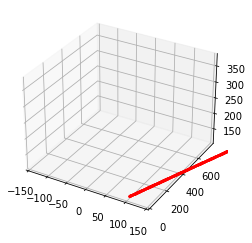

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt

T = 5              #Time taken to draw the circle 
delT = 0.01        
n= int(T/delT)

a = 0*3.14/180    #Initial joint angles
b = 0
c = 0*3.14/180
d = -90*3.14/180
e = 0
f = 0*3.14/180
g = 0

q = [a,b,c,d,f,g]
xg = np.zeros(n)
yg = np.zeros(n)
zg = np.zeros(n)
d1 = 70
d3 = 600
d5 = 550
d7 = 105.5

A = np.matrix([0,0,0,1])

i = 0

for i in range (0,n):
    #Using the updated joint angle values to get the position of end effector at each time instant from the forward kinematics equations
    T01 = np.matrix([[math.cos(q[0]), 0, math.sin(q[0]), 0], [math.sin(q[0]), 0, -math.cos(q[0]), 0], [0, 1, 0, d1], [0, 0, 0, 1] ])
    T12 = np.matrix([[math.cos(q[1]), 0, -math.sin(q[1]), 0], [math.sin(q[1]), 0, math.cos(q[1]), 0], [0, -1, 0, 0], [0, 0, 0, 1] ])
    T23 = np.matrix([[math.cos(q[2]), 0, math.sin(q[2]), 0], [math.sin(q[2]), 0, -math.cos(q[2]), 0], [0, 1, 0, d3], [0, 0, 0, 1] ])
    T35 = np.matrix([[math.cos(q[3]), -math.sin(q[3]), 0, d5*math.cos(q[3])], [math.sin(q[3]), math.cos(q[3]),0, d5*math.sin(q[3])], [0, 0, 0, 0], [0, 0, 0, 1] ])
    T56 = np.matrix([[math.cos(q[4]), 0, -math.sin(q[4]), 0], [math.sin(q[4]), 0, math.cos(q[4]), 0], [0, -1, 0, 0], [0, 0, 0, 1] ])
    T67 = np.matrix([[math.cos(q[5]), -math.sin(q[5]), 0, 0], [math.sin(q[5]), math.cos(q[5]),0, 0], [0, 0, 0, d7], [0, 0, 0, 1] ])


    T = T01*T12*T23*T35*T56*T67*A.T
        
     
    xg[i] = T[0]      #Position of end effector at each time instant in the x-z plane
    yg[i] = T[1]
    zg[i] = T[2]

    T02 = T01*T12
    T03 = T01*T12*T23
    #T04 = T01*T12*T23*T34
    T05 = T01*T12*T23*T35
    T06 = T01*T12*T23*T35*T56
    T07 = T01*T12*T23*T35*T56*T67
  
    O0 = np.matrix([[0], [0], [0]])
    O1 = T01[0:3,3]
    O2 = T02[0:3,3]
    O3 = T03[0:3,3]
    O5 = T05[0:3,3]
    O6 = T06[0:3,3]
    O7 = T07[0:3,3]
    
    Z0 = np.matrix([[0], [0], [1]])
    Z1 = T01[0:3,2]
    Z2 = T02[0:3,2]
    Z3 = T03[0:3,2]
    Z5 = T05[0:3,2]
    Z6 = T06[0:3,2]
    
    B1 = np.cross(Z0.T, (O7-O0).T)
    B2 = np.cross(Z1.T, (O7-O1).T)
    B3 = np.cross(Z2.T, (O7-O2).T)
    B4 = np.cross(Z3.T, (O7-O3).T)
    B5 = np.cross(Z5.T, (O7-O5).T)
    B6 = np.cross(Z6.T, (O7-O6).T)

    J1 = np.zeros(6)
    J2 = np.zeros(6)
    J3 = np.zeros(6)
    J4 = np.zeros(6)
    J5 = np.zeros(6)
    J6 = np.zeros(6)
    
    J1[0:3] = B1
    J1[3:6] = Z0.T
    J2[0:3] = B2
    J2[3:6] = Z1.T
    J3[0:3] = B3
    J3[3:6] = Z2.T
    J4[0:3] = B4
    J4[3:6] = Z3.T
    J5[0:3] = B5
    J5[3:6] = Z5.T
    J6[0:3] = B6
    J6[3:6] = Z6.T


    JT = np.zeros((6,6))
    JT[0:6][0] = J1.T
    JT[0:6][1] = J2.T
    JT[0:6][2] = J3.T
    JT[0:6][3] = J4.T
    JT[0:6][4] = J5.T
    JT[0:6][5] = J6.T

    J = JT.T     #Final jacobian matrix

    Jinv = np.linalg.pinv(J)
    V = np.matrix([[50], [0], [50], [0], [0], [0]])
    q_dot = np.dot(Jinv,V)
    
    #Updating q values using joint angle velocity obtained in the previous step
    q[0] += delT*q_dot[0]
    q[1] += delT*q_dot[1]
    q[2] += delT*q_dot[2]
    q[3] += delT*q_dot[3]
    q[4] += delT*q_dot[4]
    q[5] += delT*q_dot[5]
    print(q[5])
      
j=0    

#print(xg)
#Scatter plot in the 3D space
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.axis([-150, 150, 0, 782])
for j in range(n):
    ax.scatter(xg[j], yg[j], zg[j], color= "red", s=2) 

In [14]:
print(zg)

[120.08418686 120.08335352 120.08253434 120.08172897 120.08093705
 120.08015828 120.07939232 120.07863887 120.07789763 120.07716831
 120.07645064 120.07574433 120.07504912 120.07436477 120.07369101
 120.07302761 120.07237434 120.07173096 120.07109727 120.07047303
 120.06985805 120.06925212 120.06865505 120.06806664 120.06748671
 120.06691508 120.06635158 120.06579602 120.06524826 120.06470812
 120.06417545 120.06365009 120.0631319  120.06262074 120.06211645
 120.06161891 120.06112797 120.06064352 120.06016542 120.05969354
 120.05922778 120.058768   120.0583141  120.05786597 120.05742348
 120.05698655 120.05655506 120.05612892 120.05570802 120.05529227
 120.05488157 120.05447584 120.05407498 120.0536789  120.05328753
 120.05290077 120.05251855 120.05214078 120.05176739 120.05139831
 120.05103345 120.05067275 120.05031613 120.04996352 120.04961487
 120.04927009 120.04892913 120.04859192 120.0482584  120.04792851
 120.0476022  120.04727939 120.04696004 120.04664409 120.04633148
 120.04602

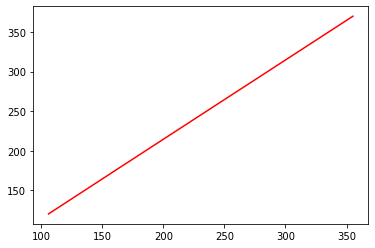

In [33]:
#Scatter plot in the x-z plane
#plt.axis([-1500, 1500, -50, 50])

j=0
plt.plot(xg, zg, color= "red")

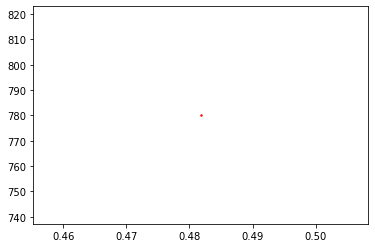

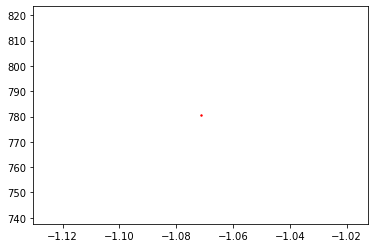

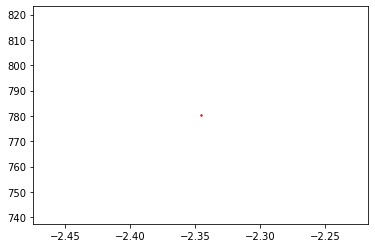

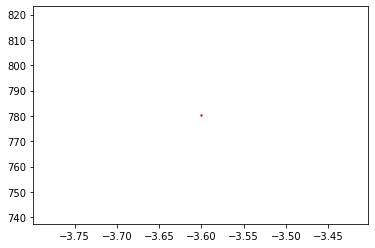

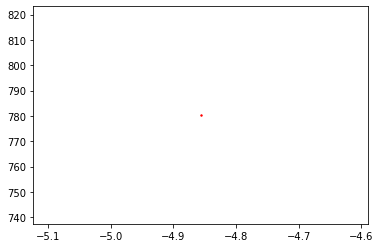

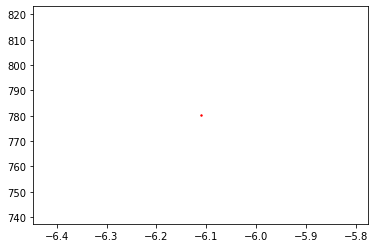

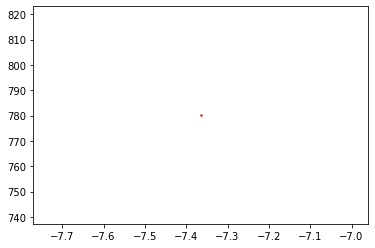

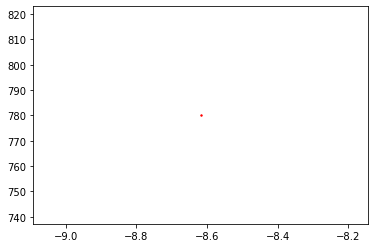

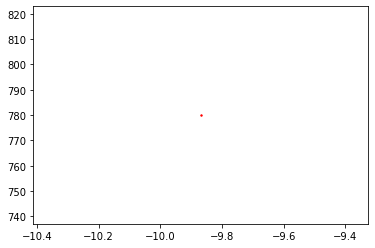

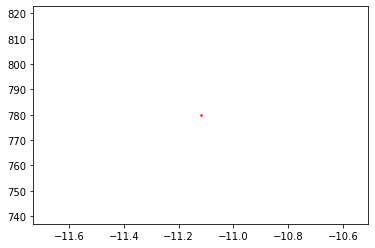

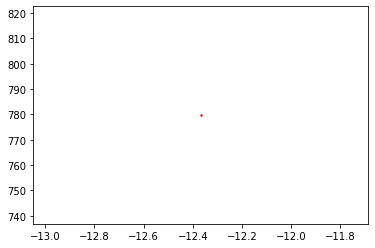

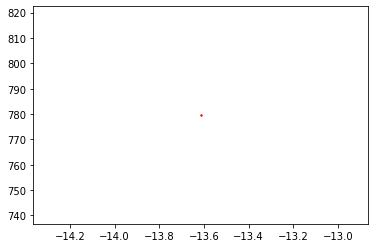

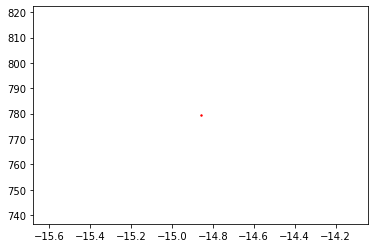

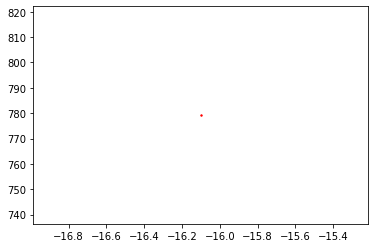

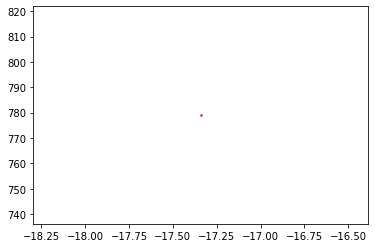

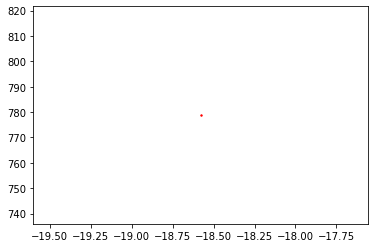

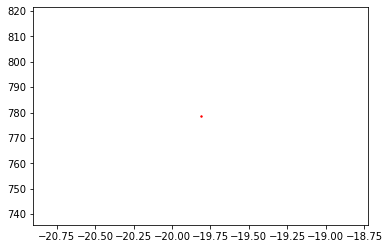

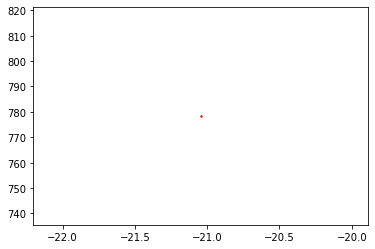

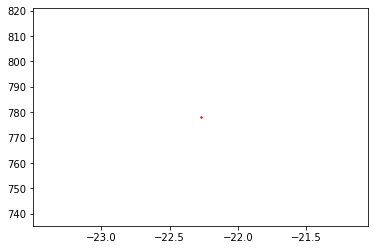

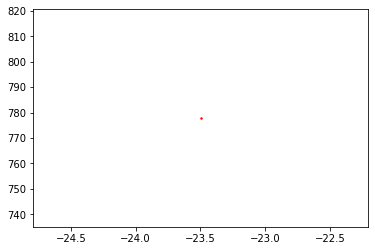

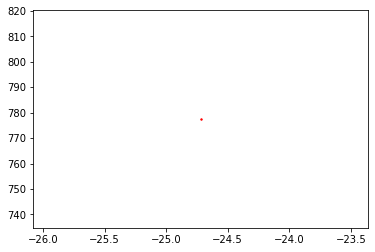

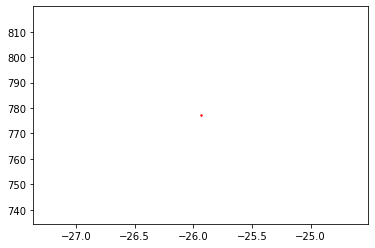

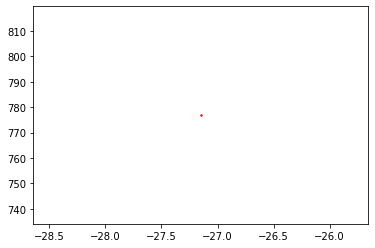

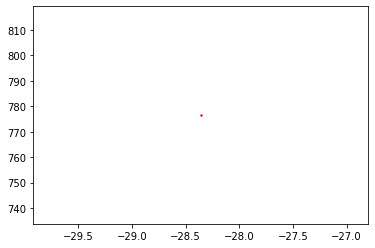

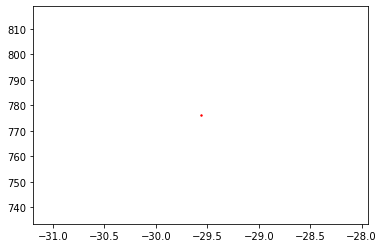

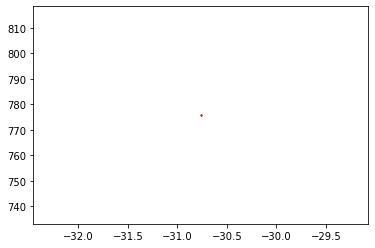

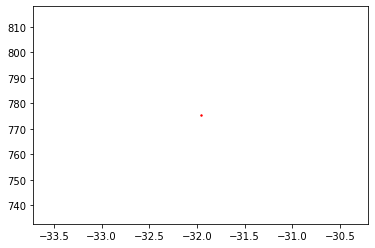

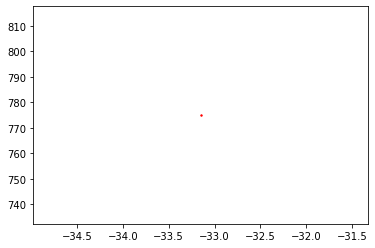

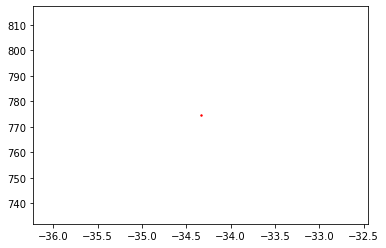

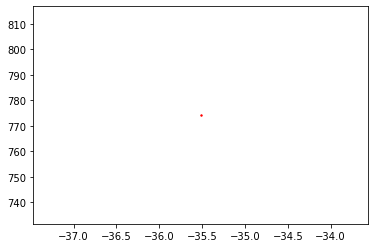

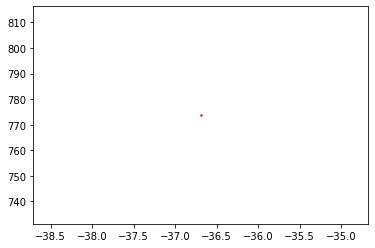

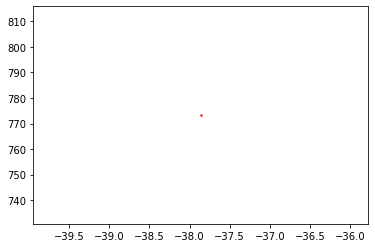

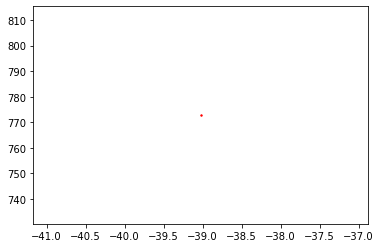

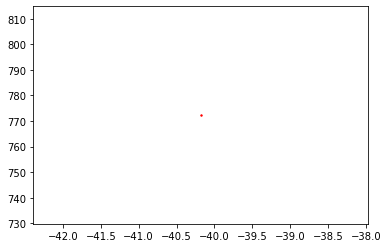

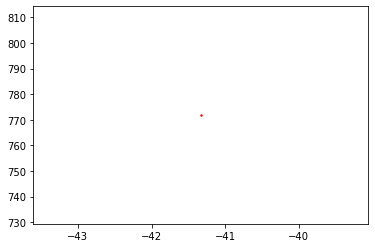

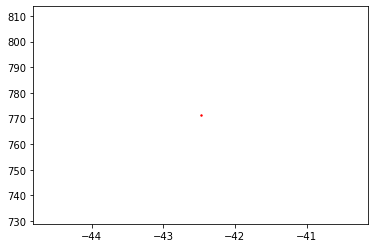

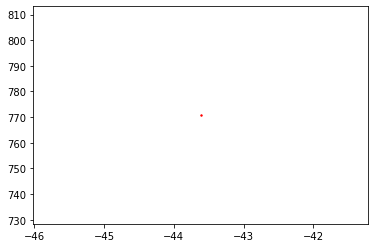

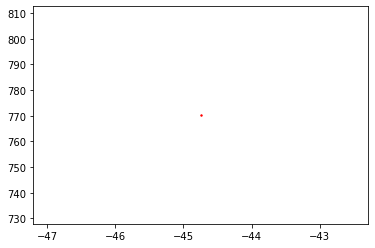

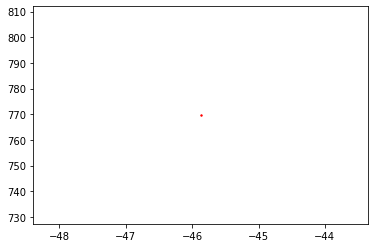

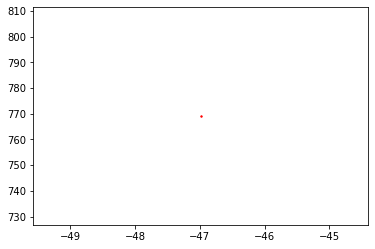

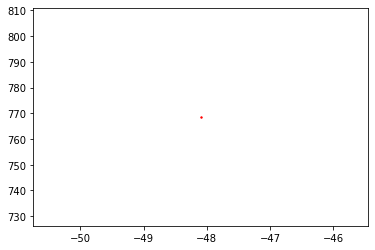

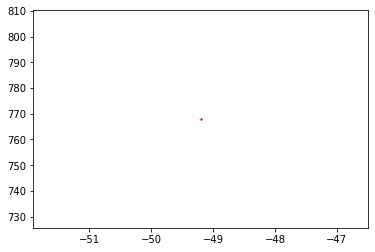

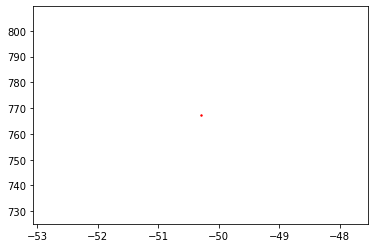

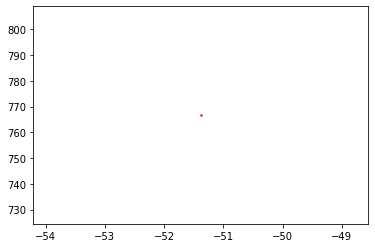

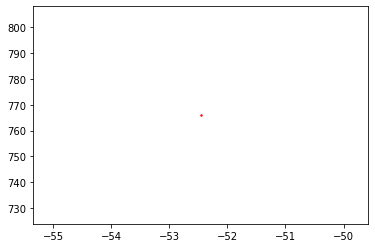

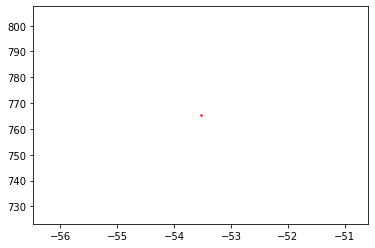

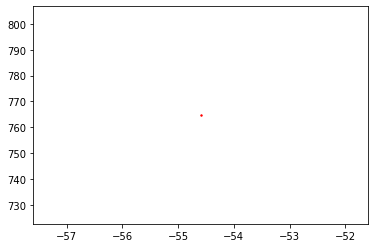

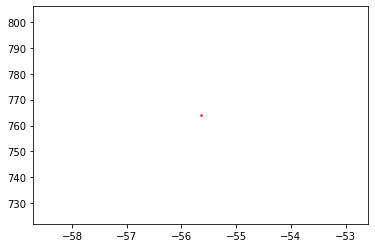

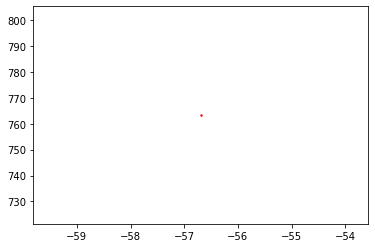

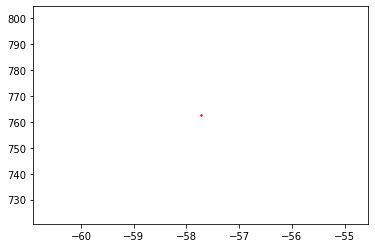

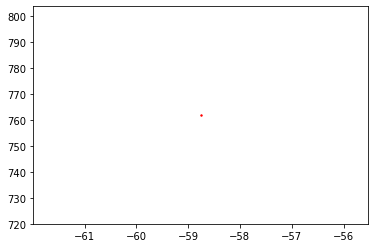

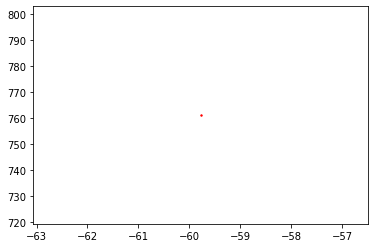

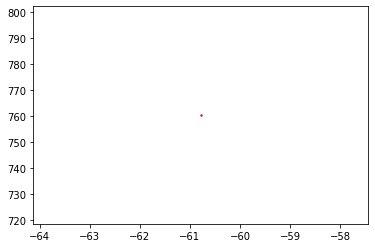

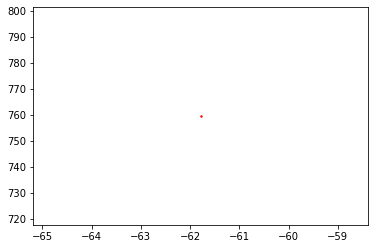

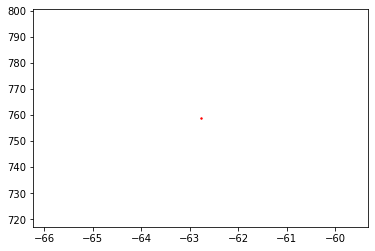

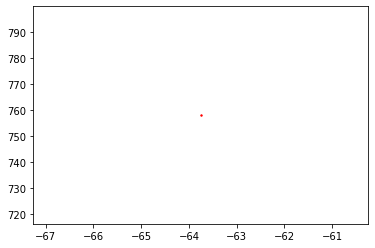

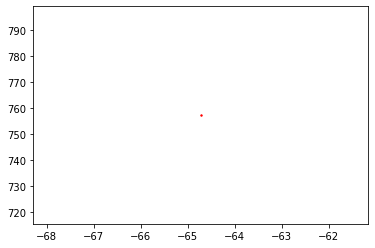

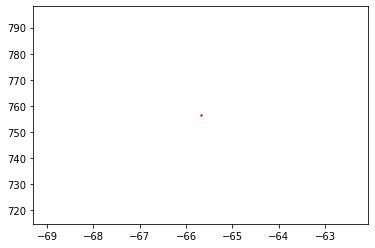

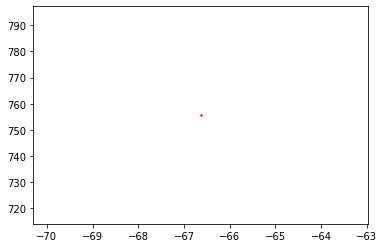

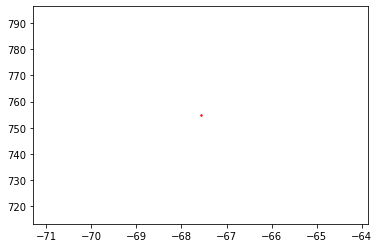

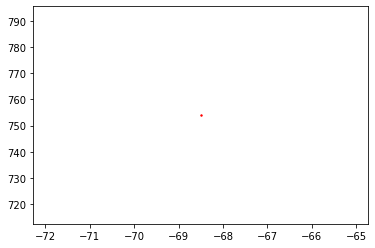

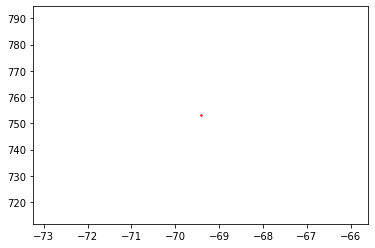

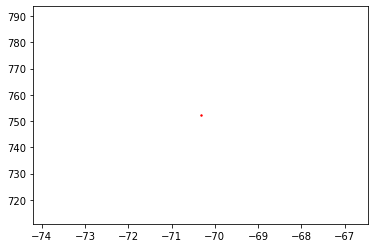

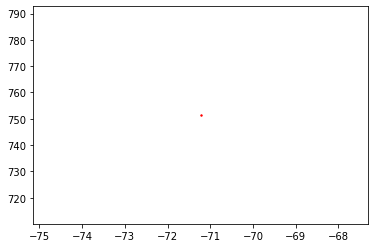

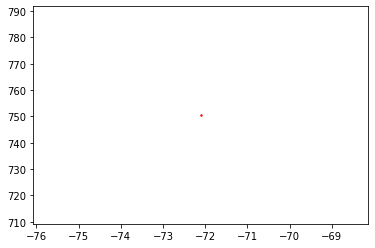

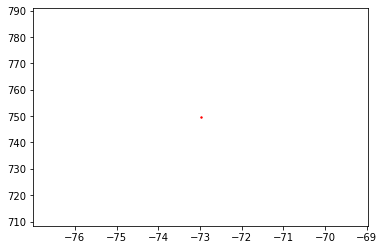

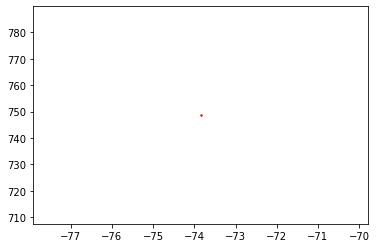

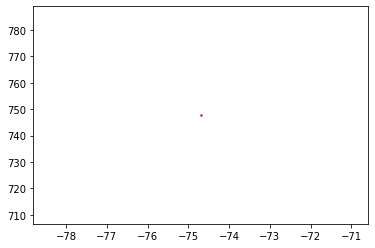

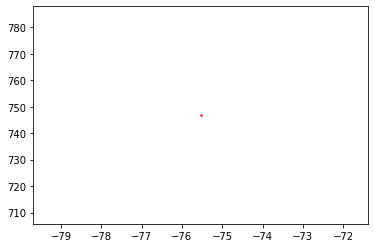

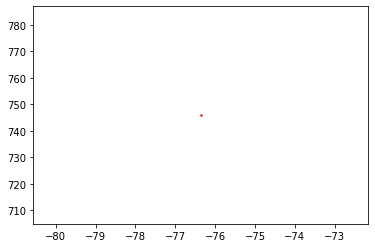

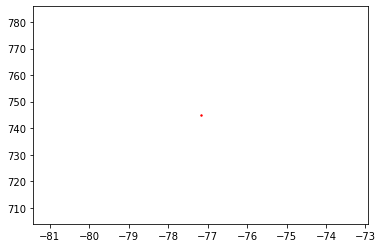

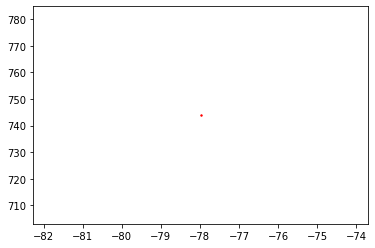

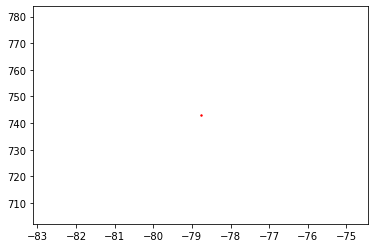

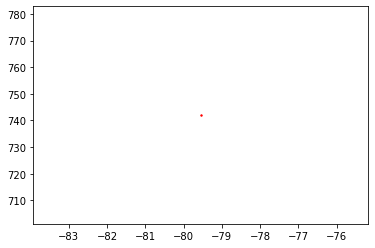

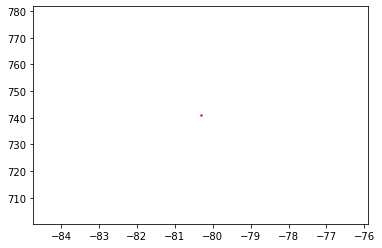

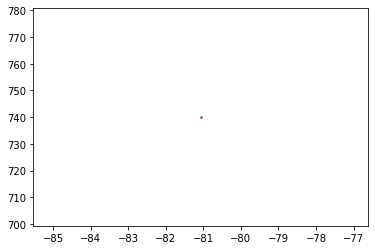

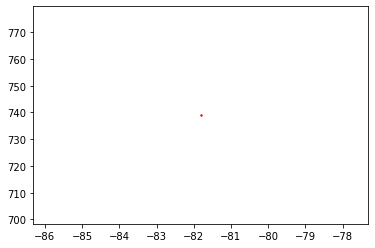

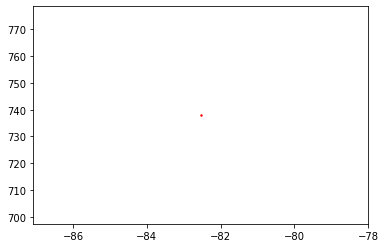

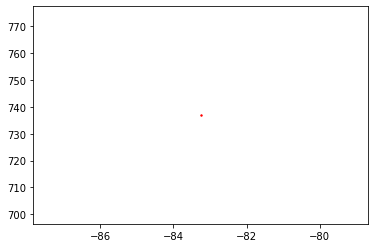

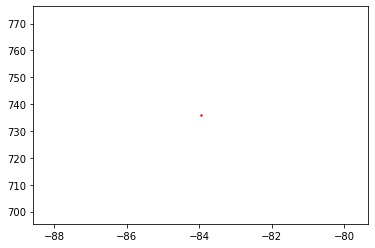

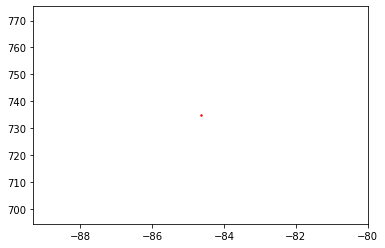

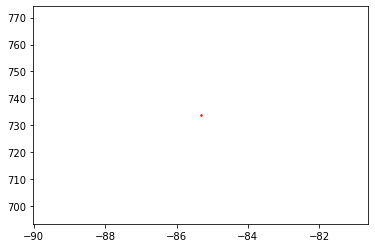

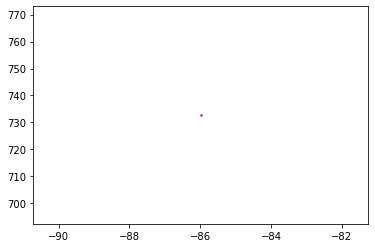

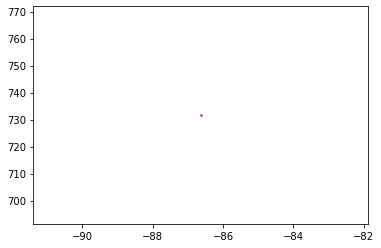

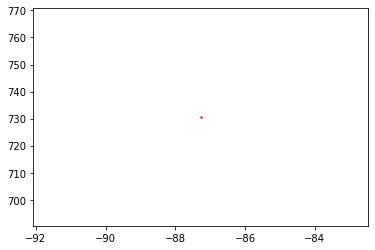

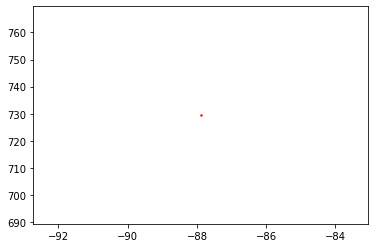

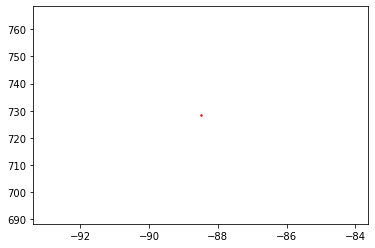

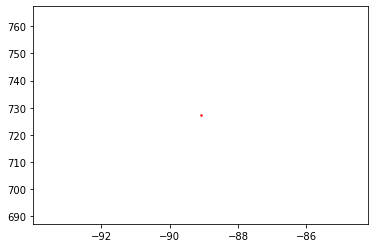

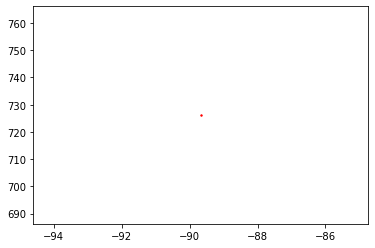

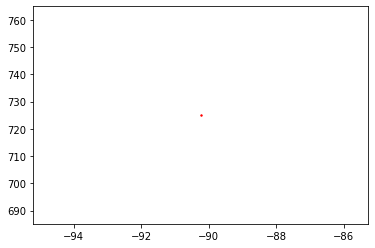

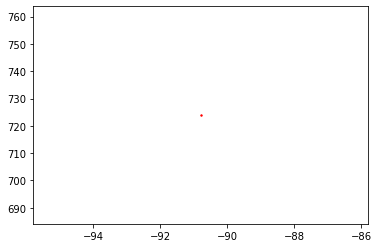

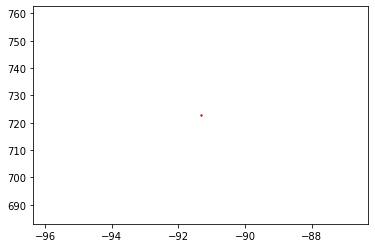

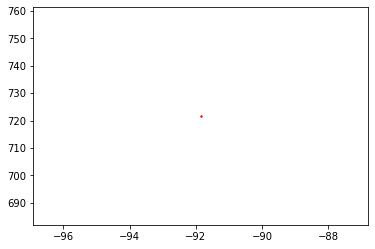

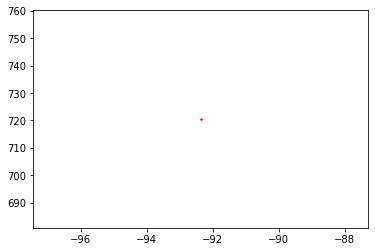

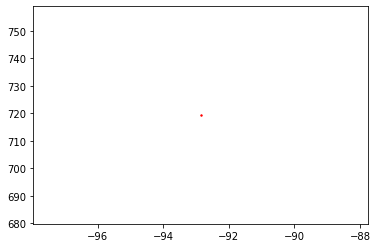

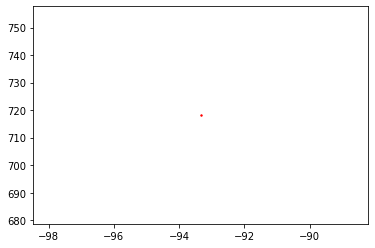

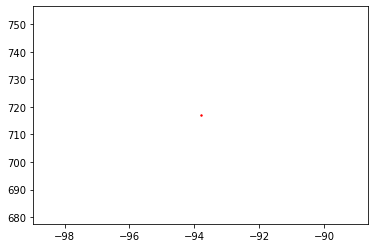

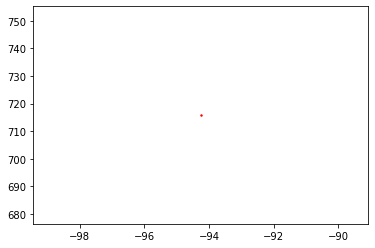

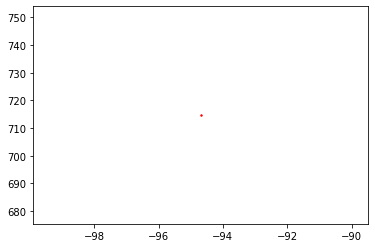

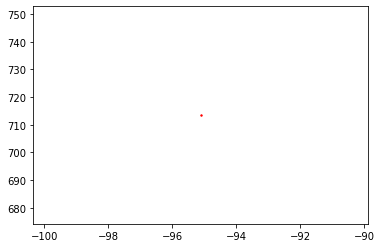

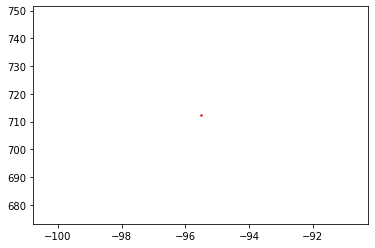

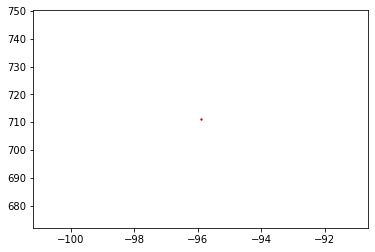

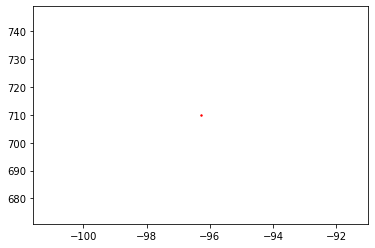

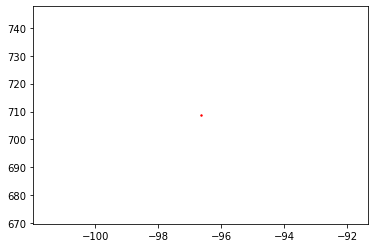

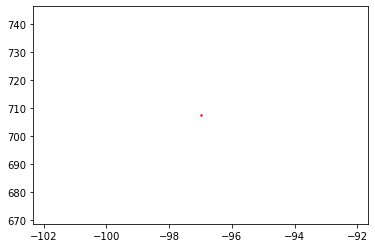

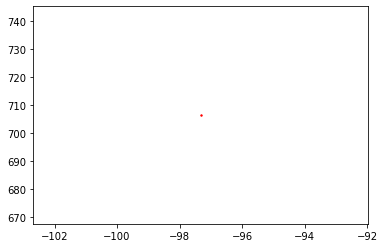

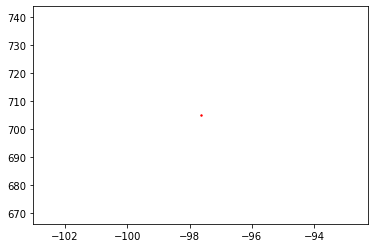

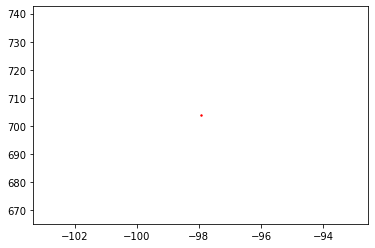

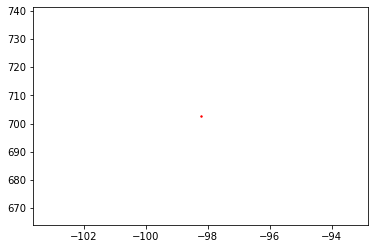

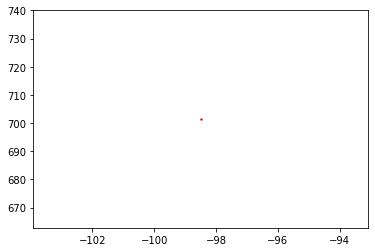

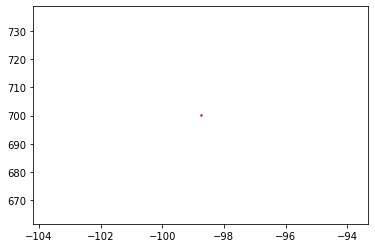

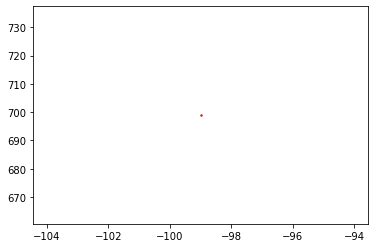

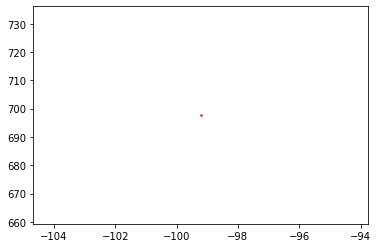

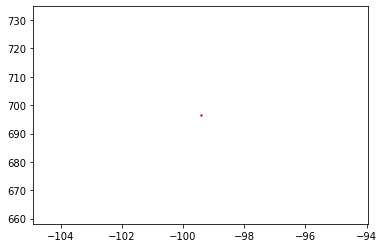

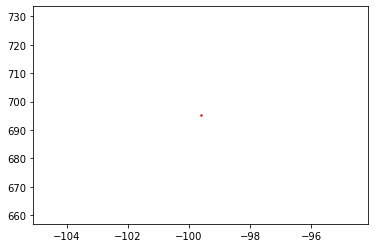

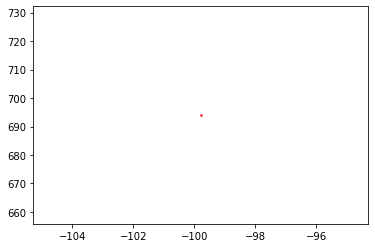

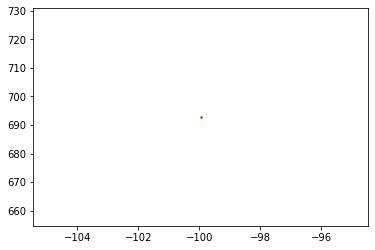

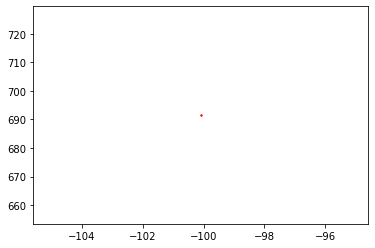

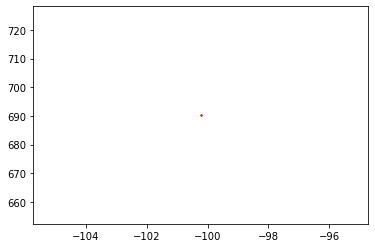

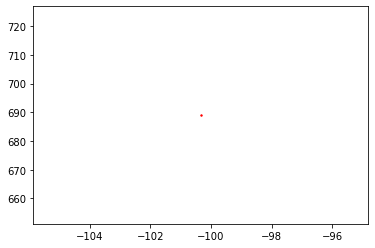

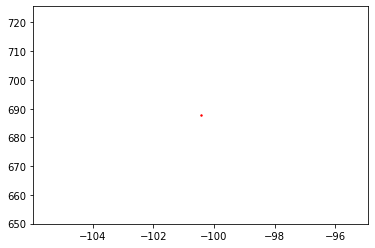

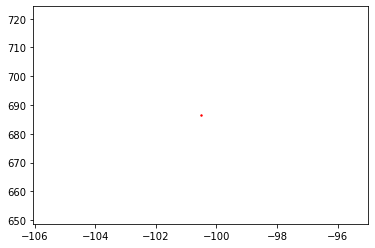

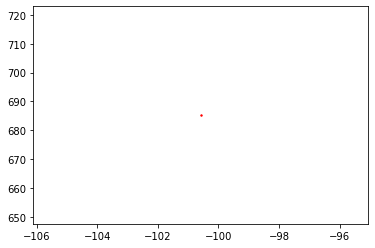

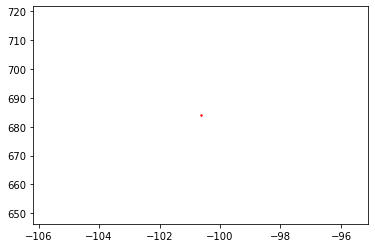

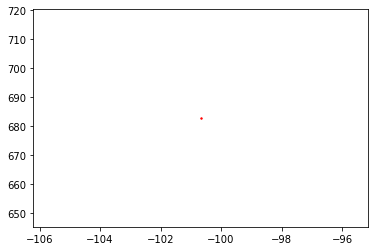

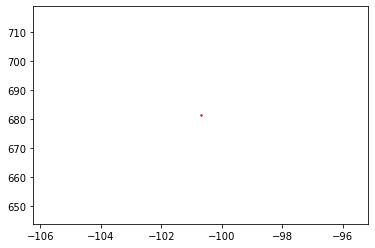

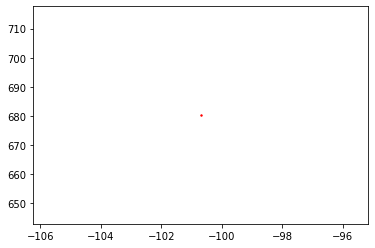

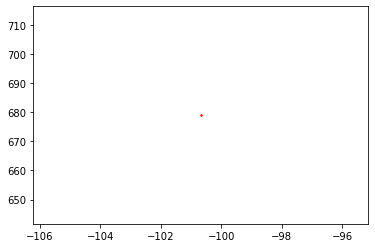

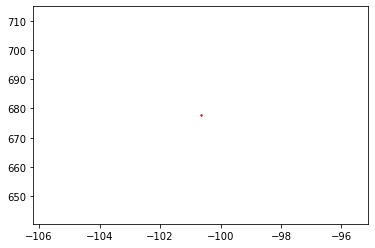

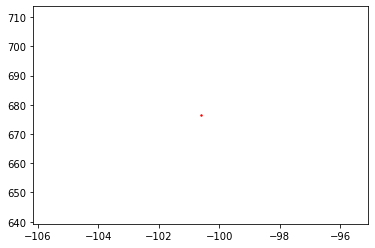

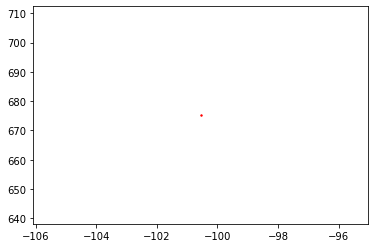

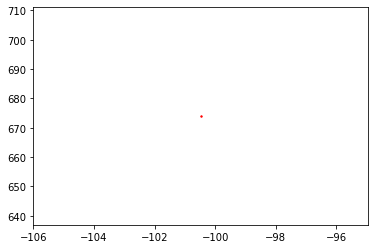

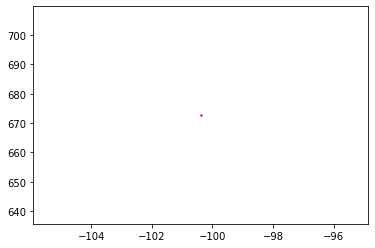

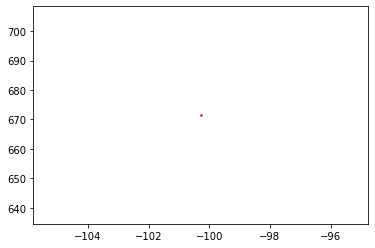

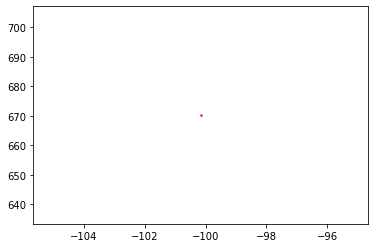

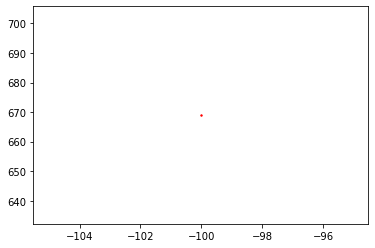

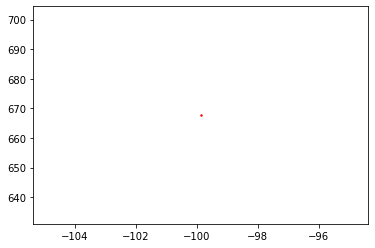

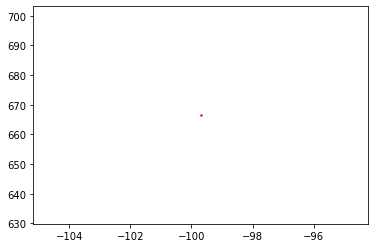

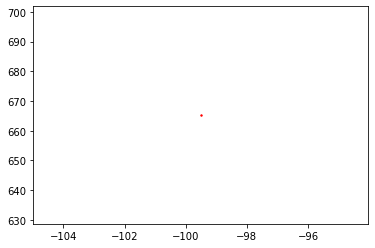

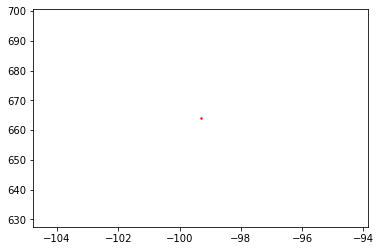

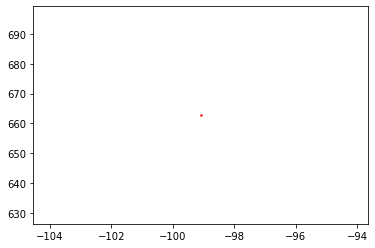

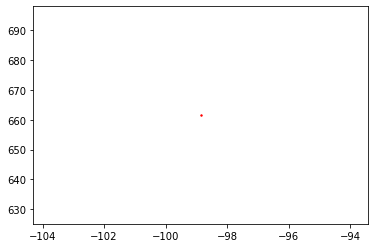

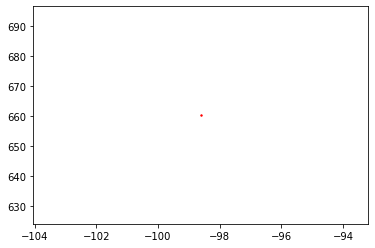

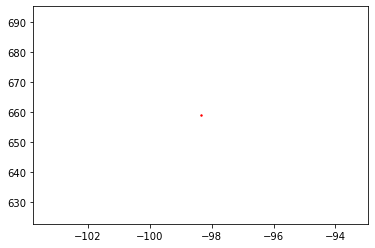

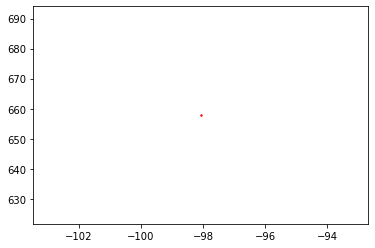

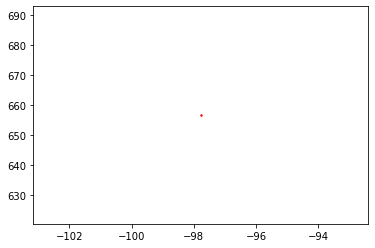

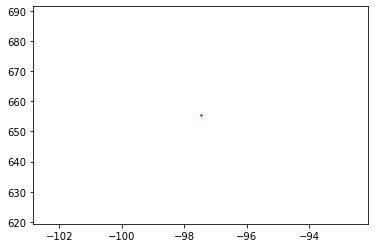

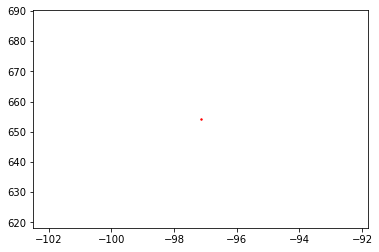

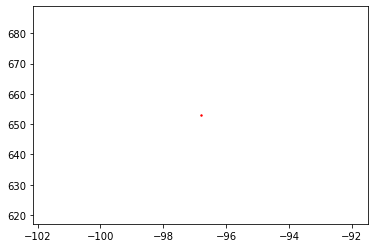

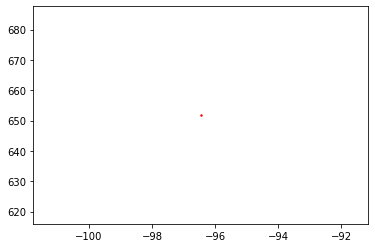

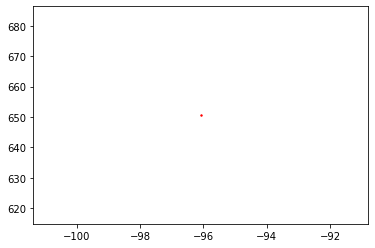

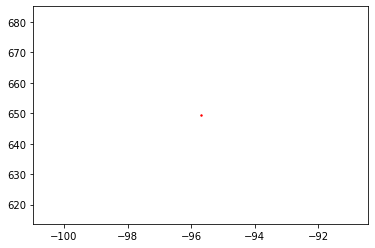

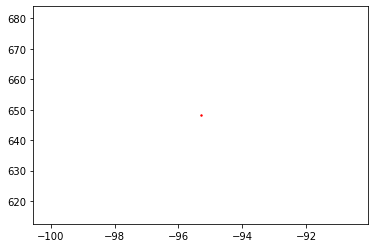

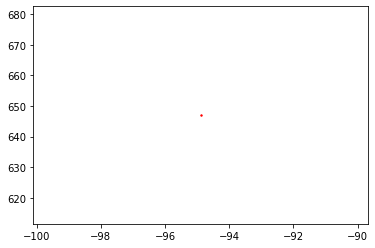

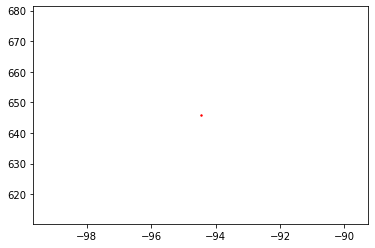

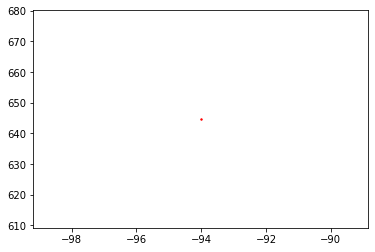

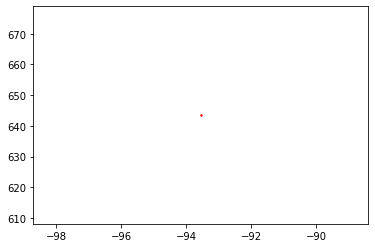

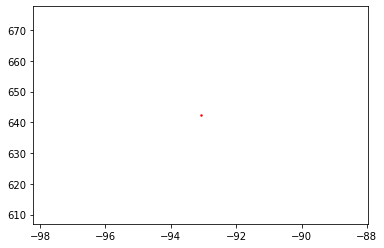

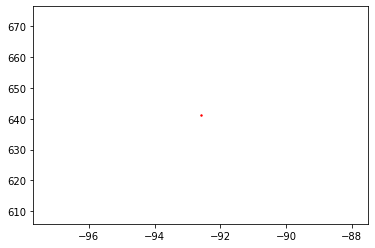

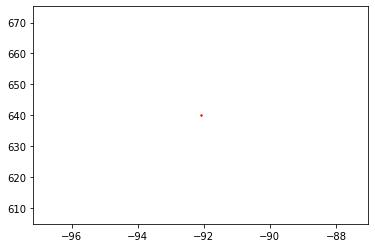

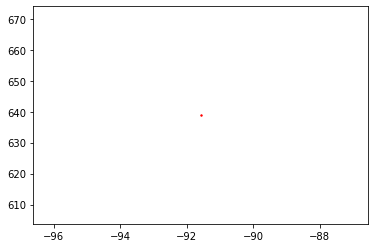

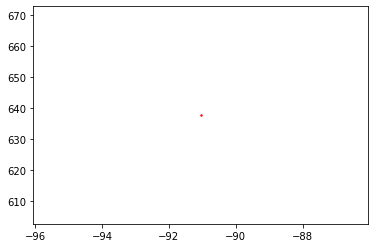

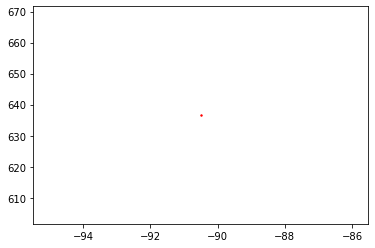

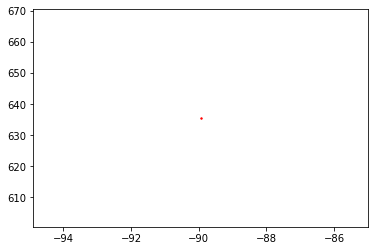

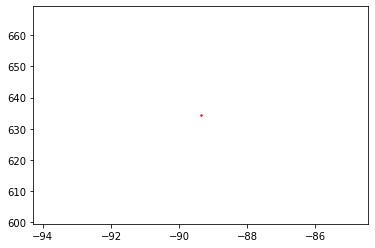

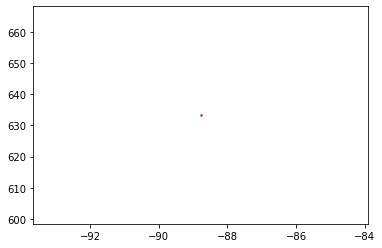

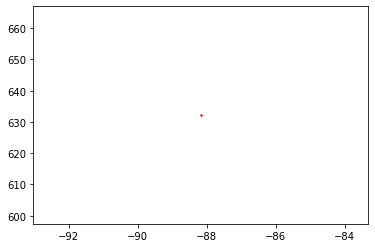

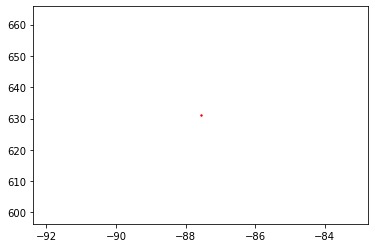

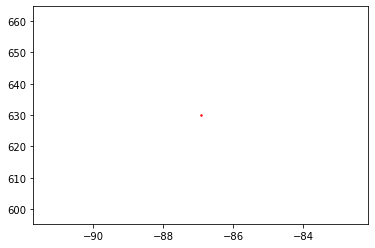

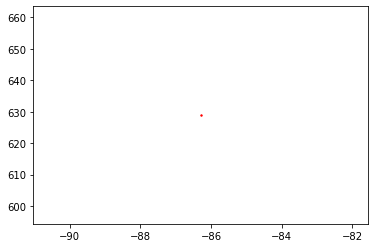

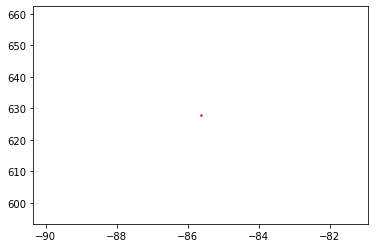

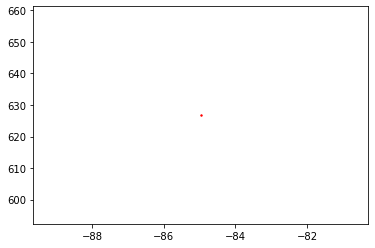

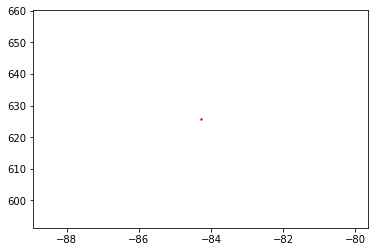

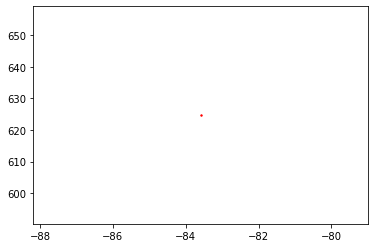

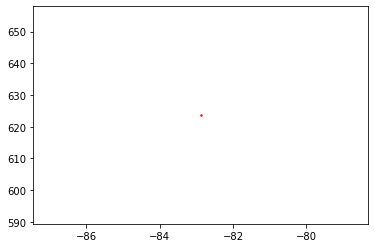

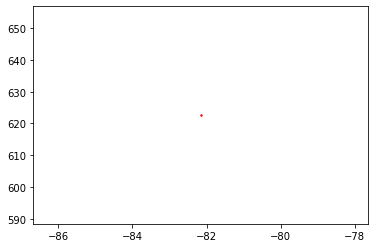

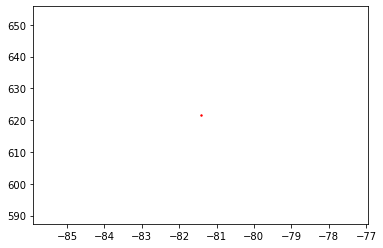

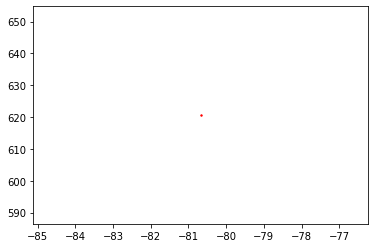

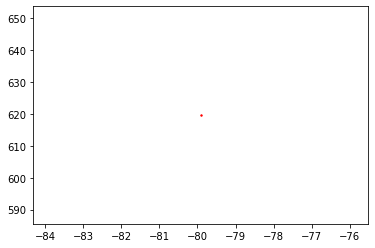

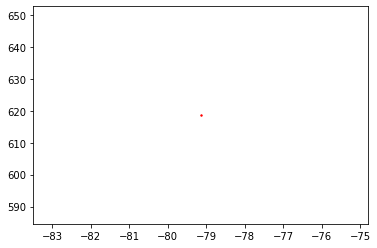

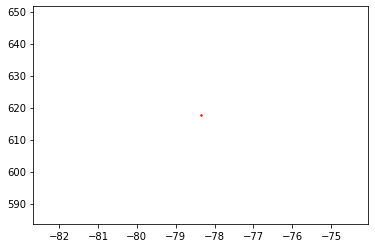

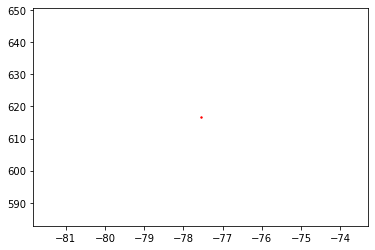

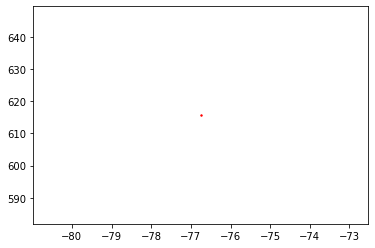

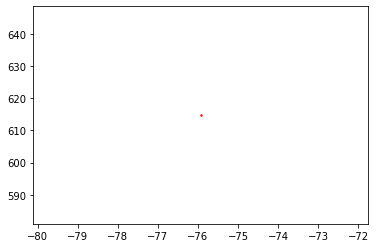

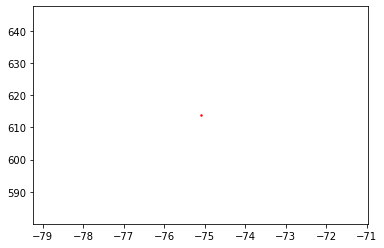

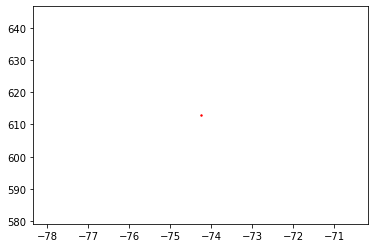

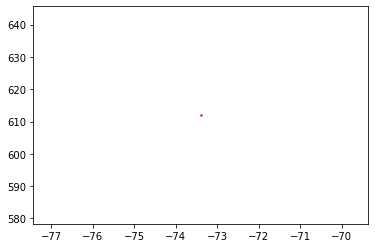

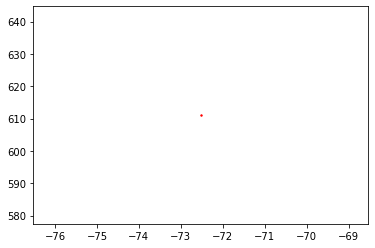

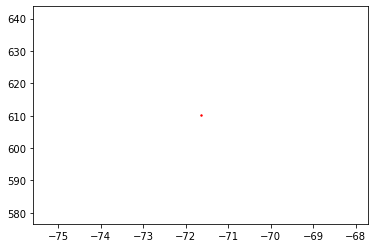

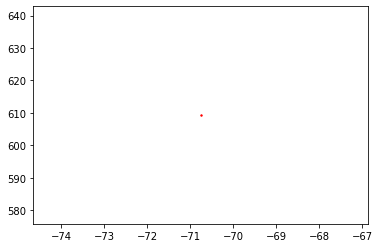

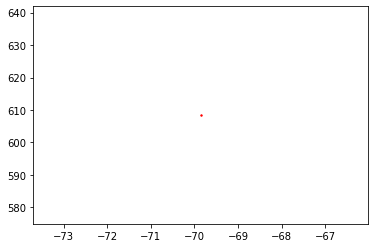

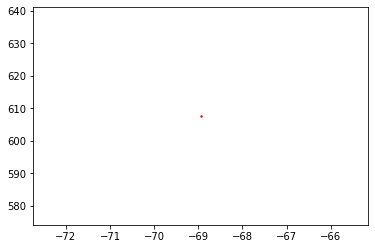

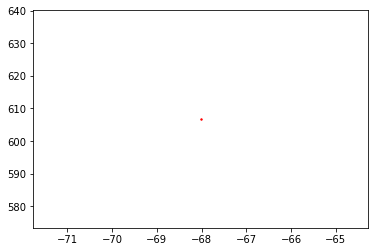

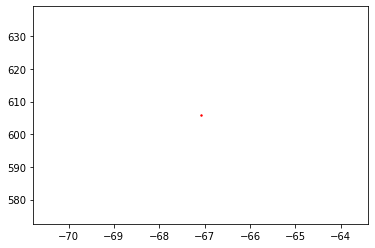

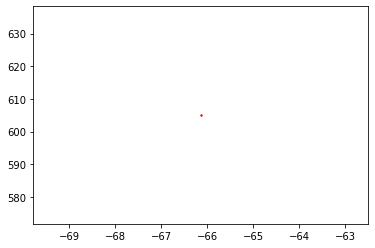

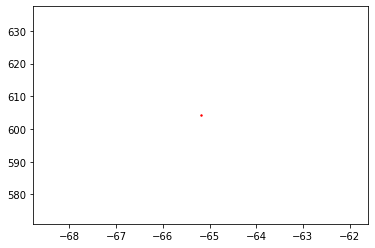

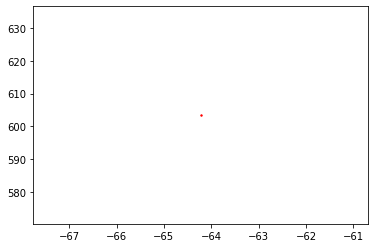

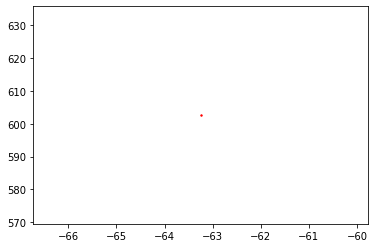

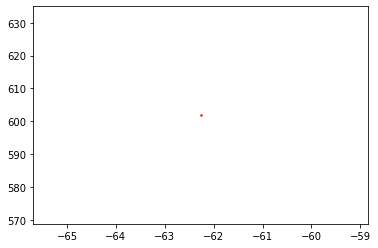

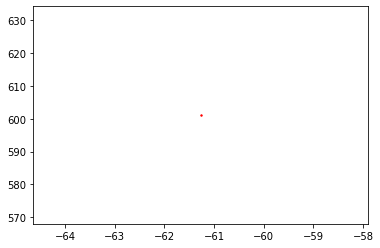

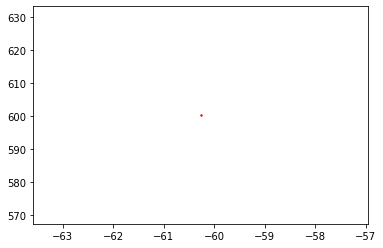

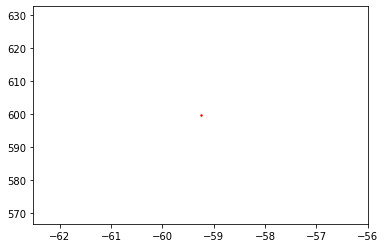

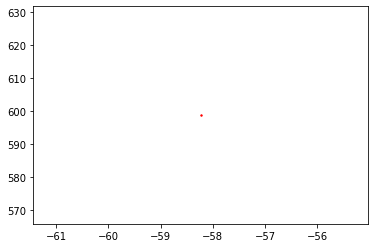

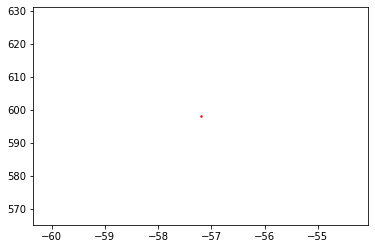

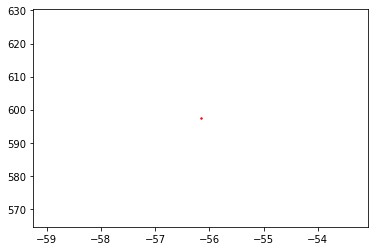

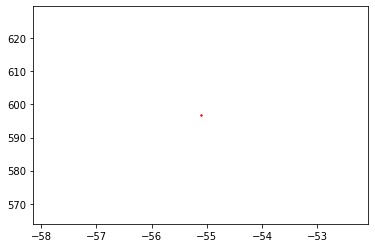

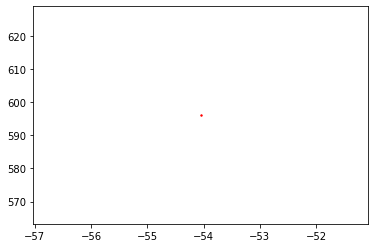

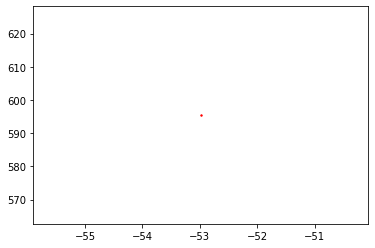

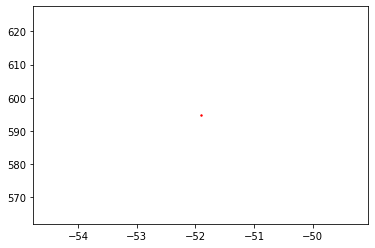

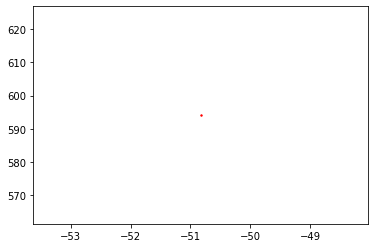

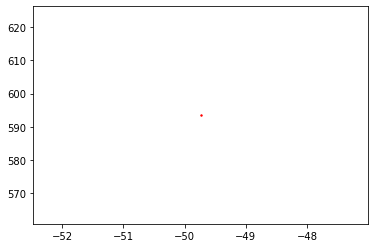

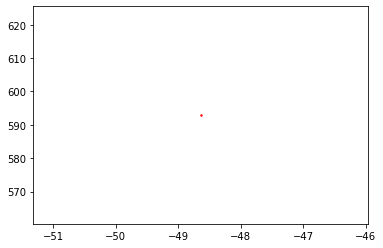

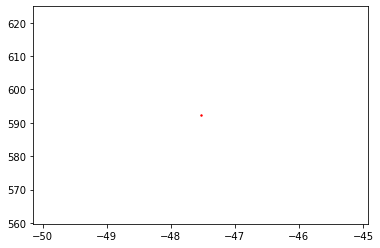

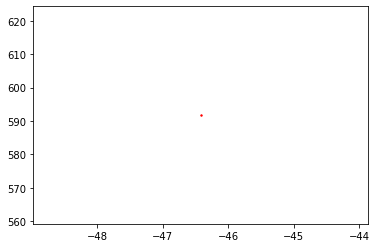

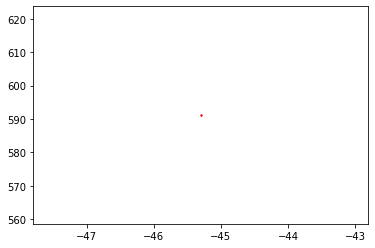

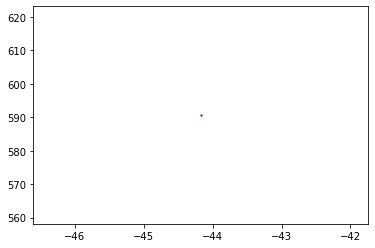

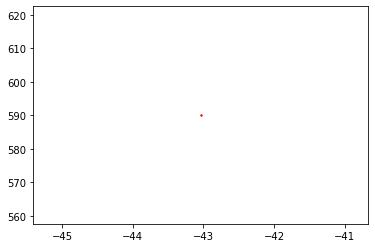

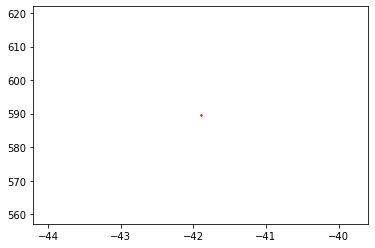

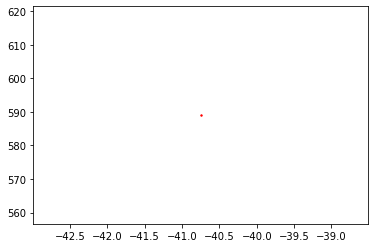

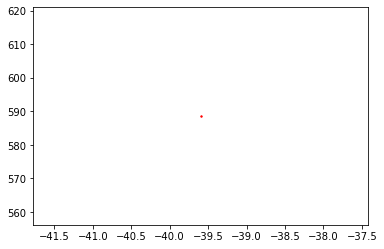

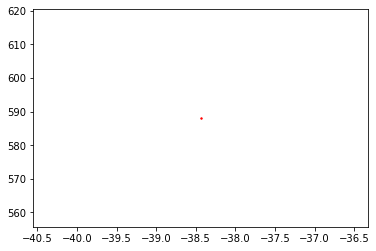

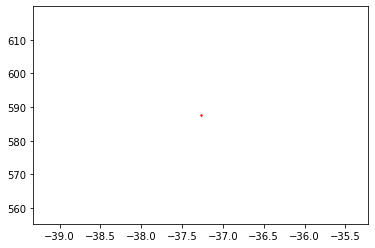

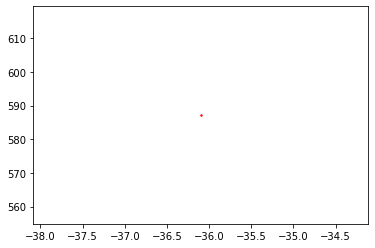

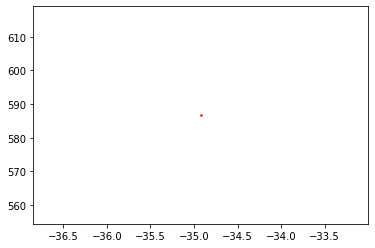

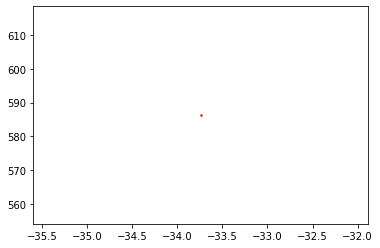

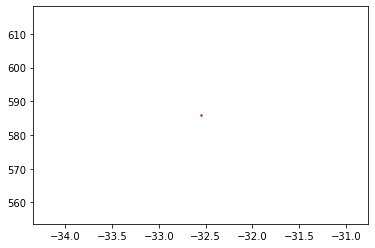

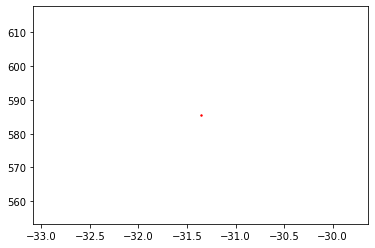

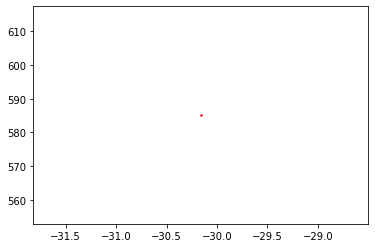

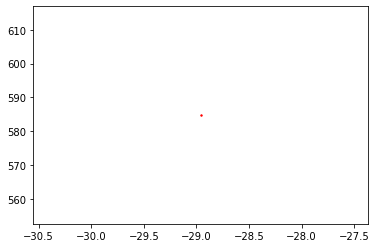

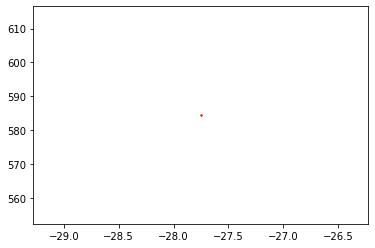

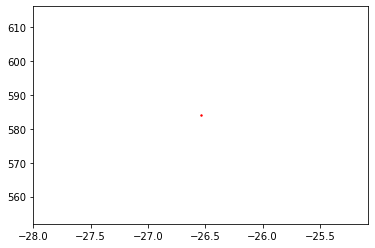

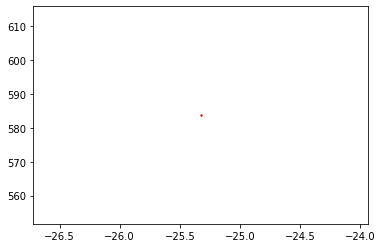

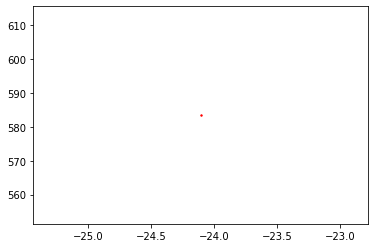

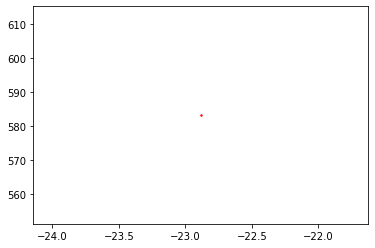

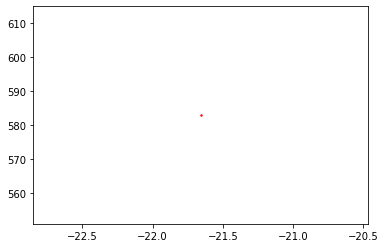

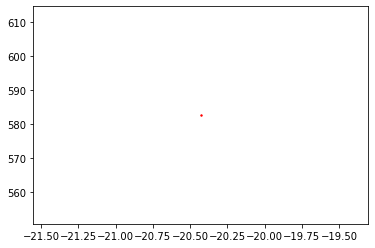

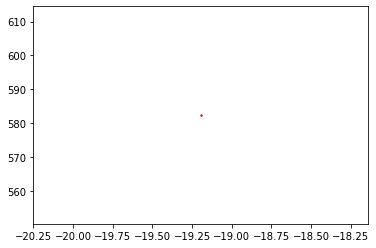

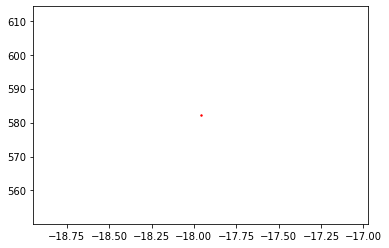

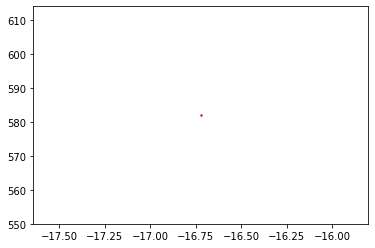

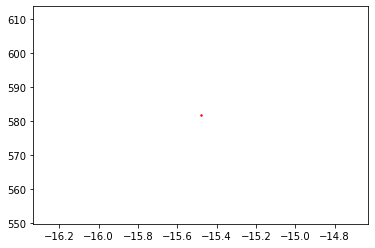

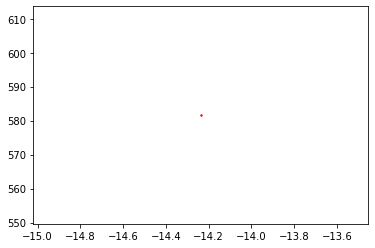

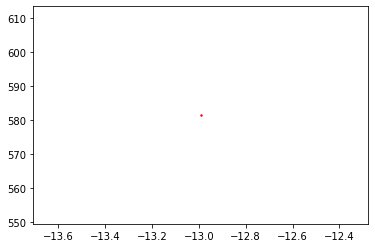

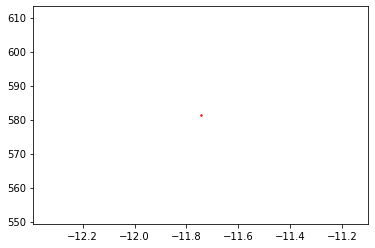

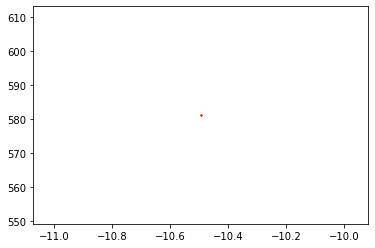

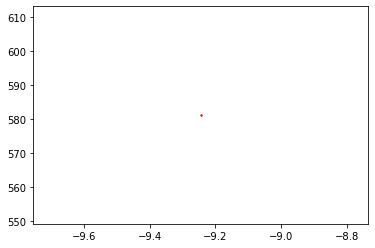

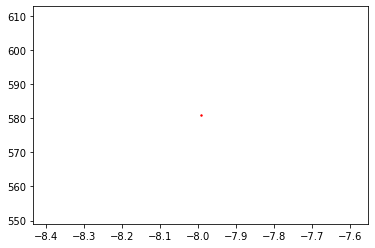

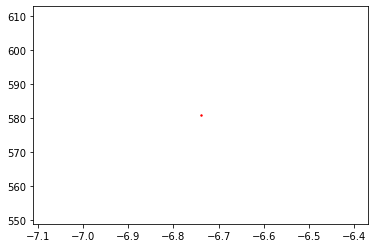

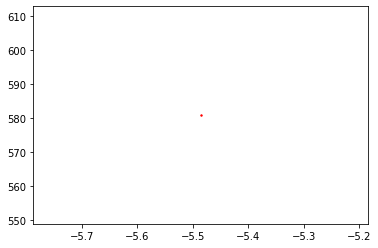

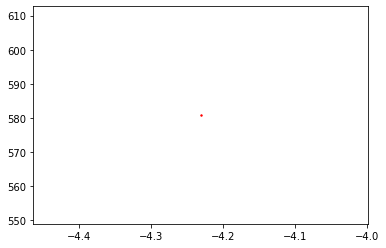

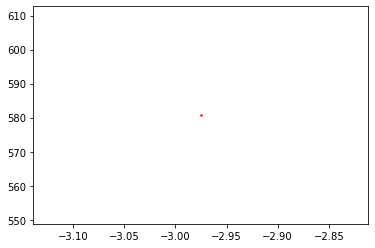

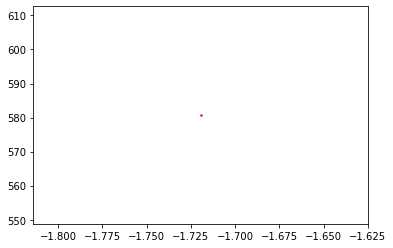

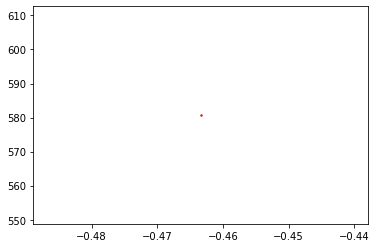

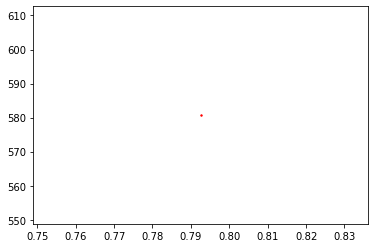

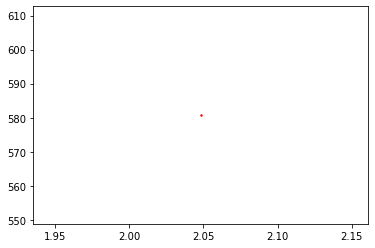

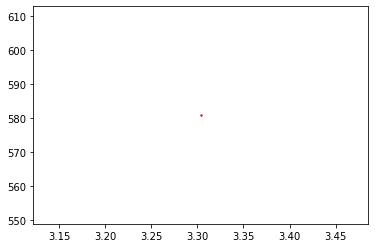

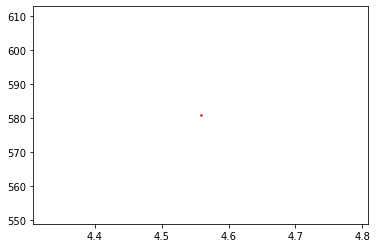

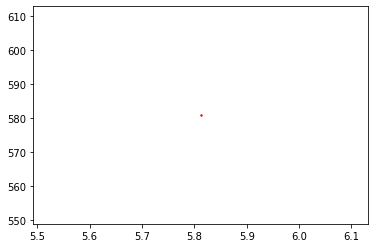

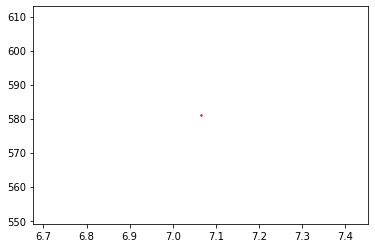

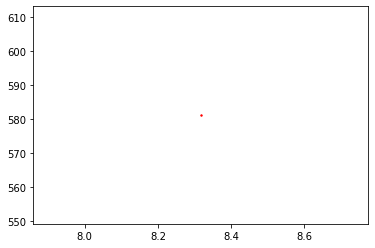

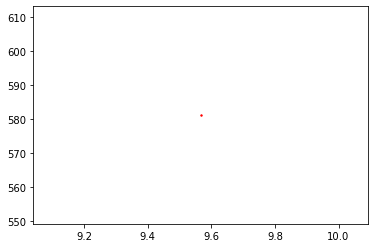

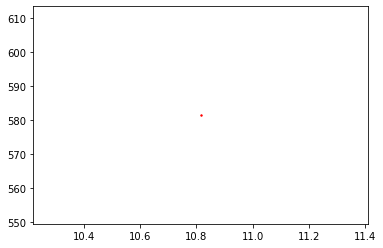

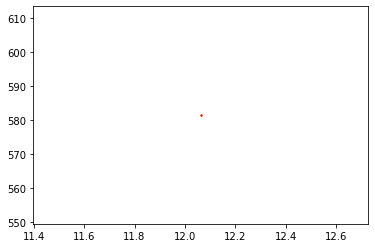

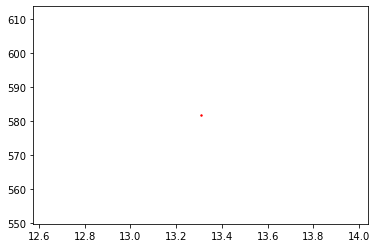

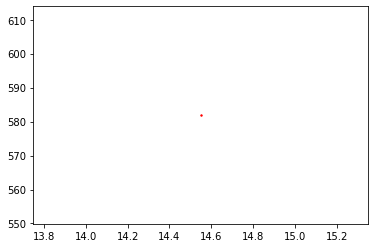

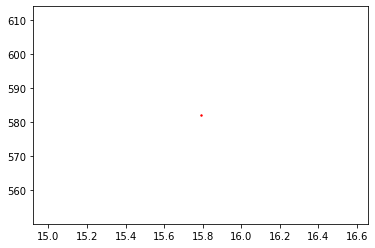

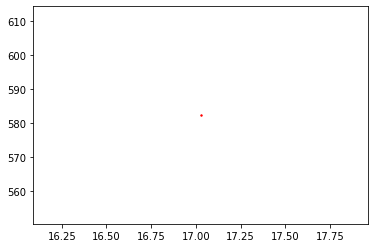

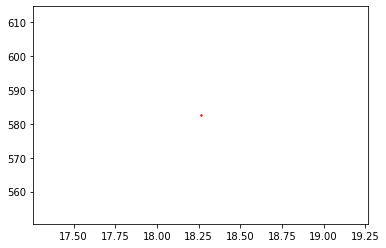

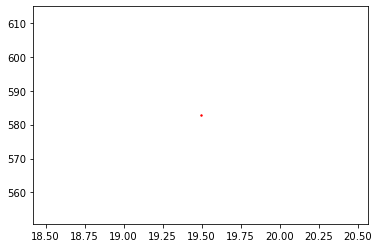

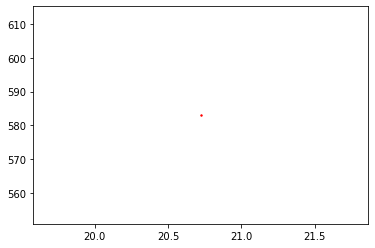

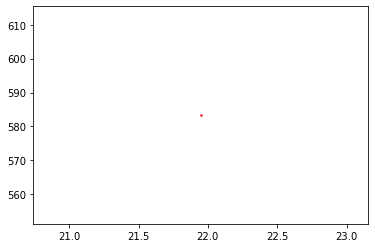

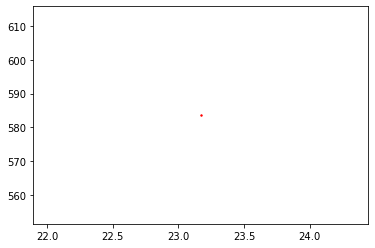

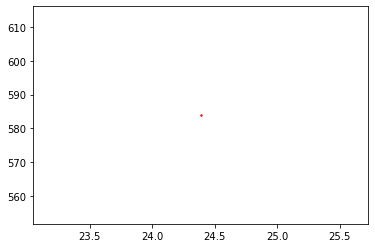

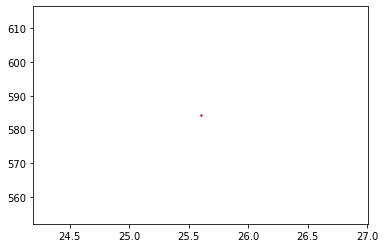

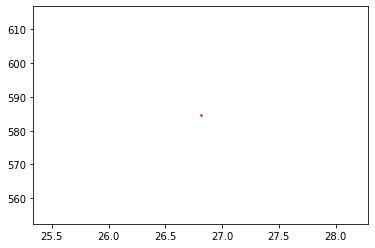

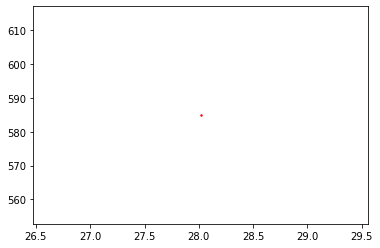

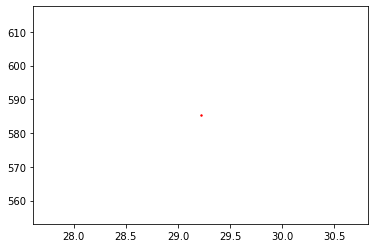

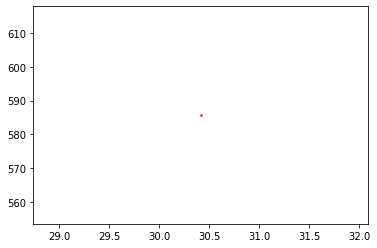

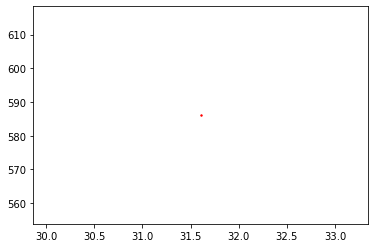

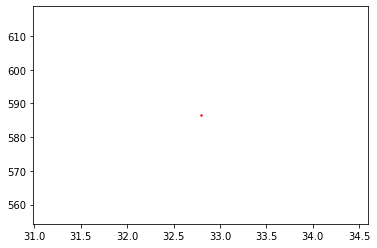

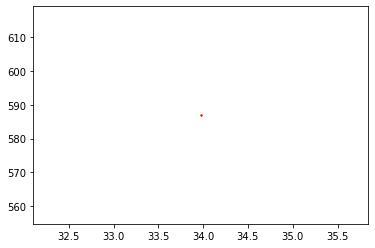

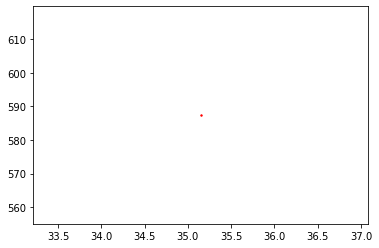

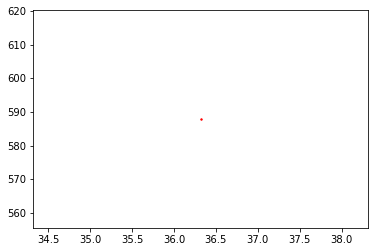

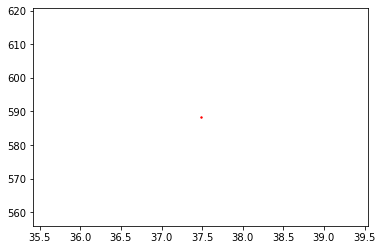

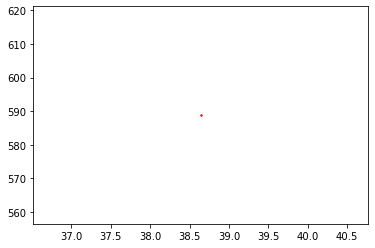

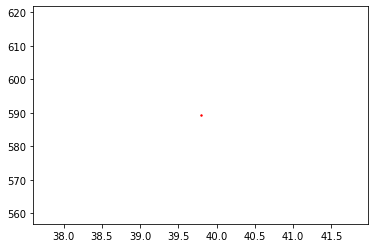

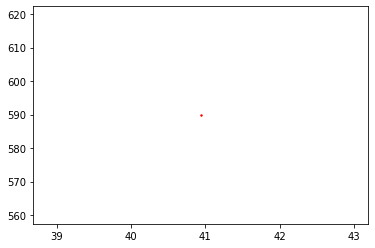

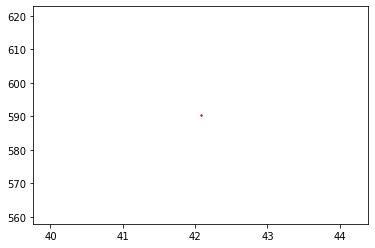

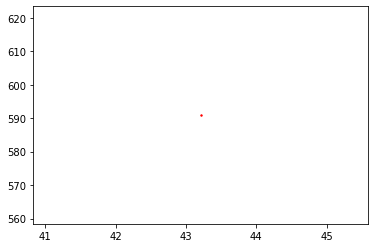

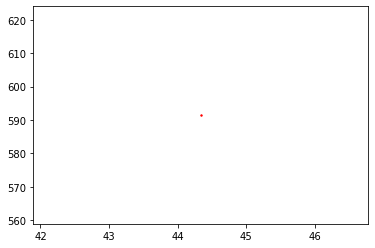

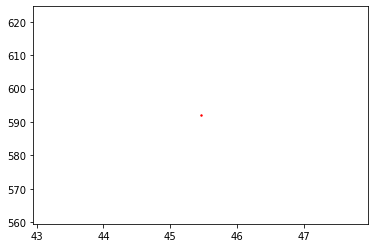

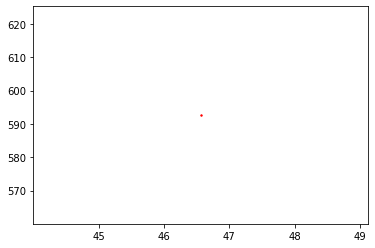

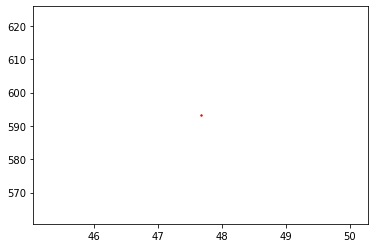

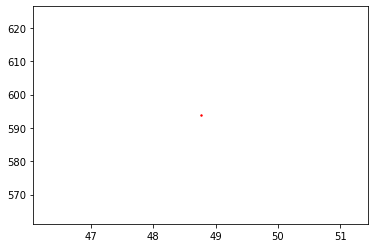

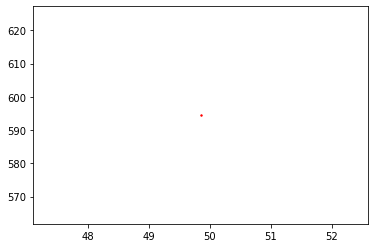

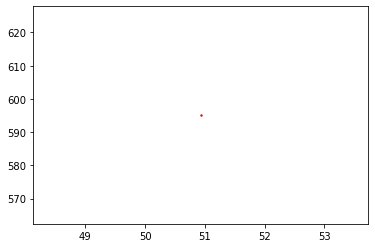

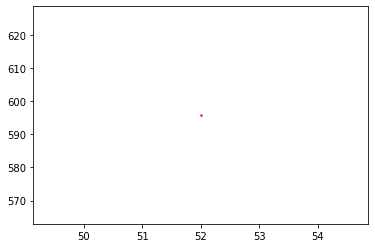

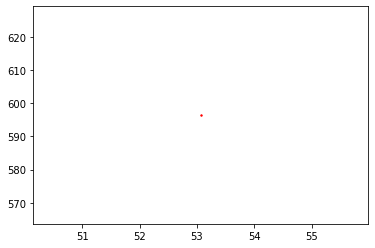

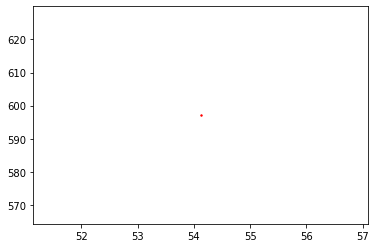

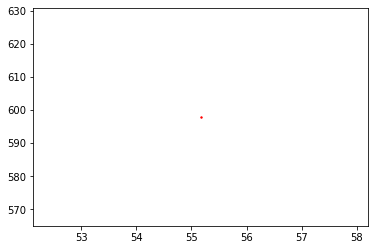

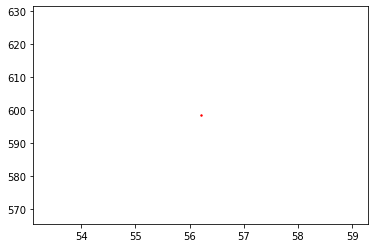

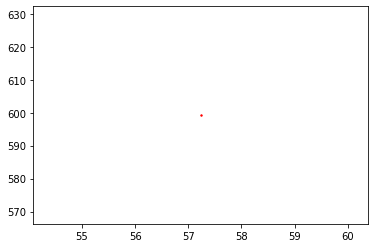

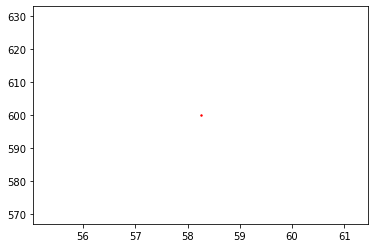

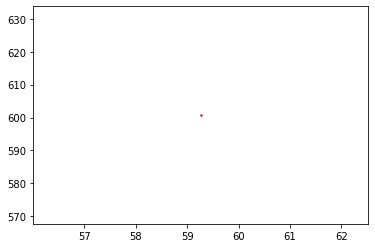

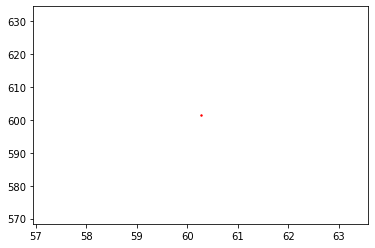

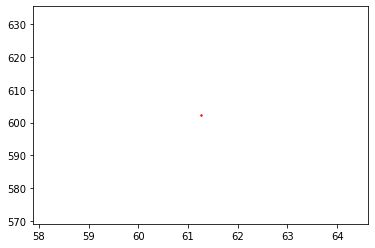

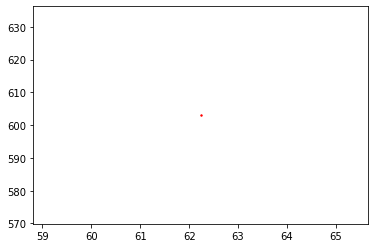

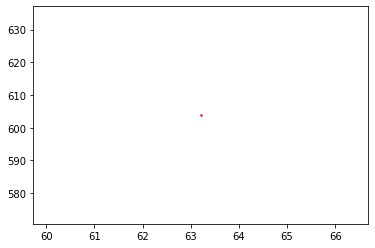

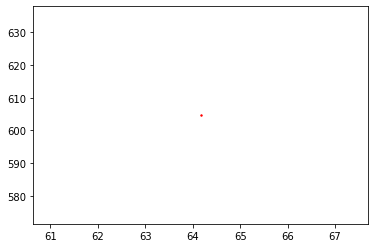

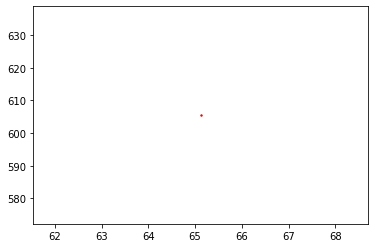

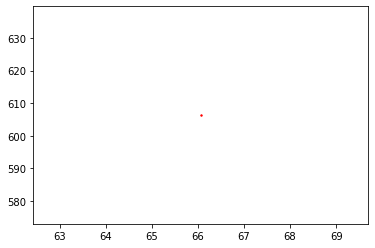

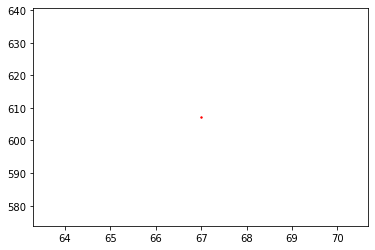

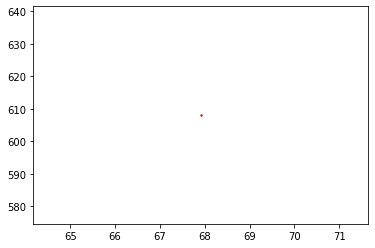

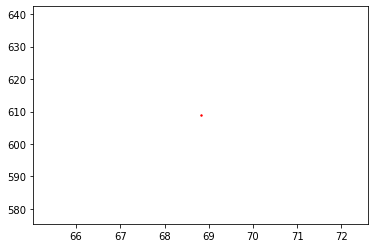

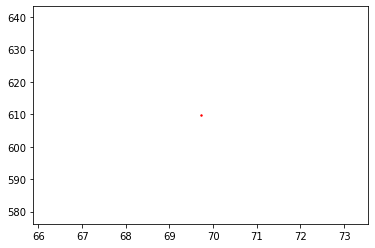

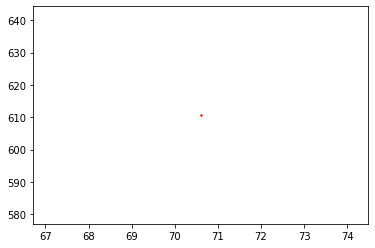

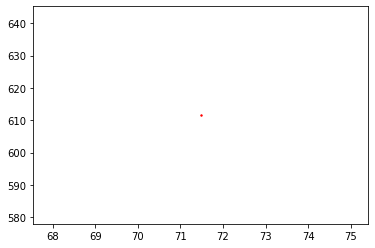

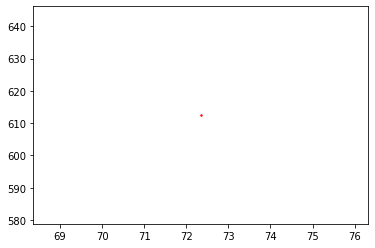

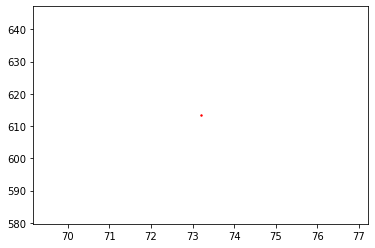

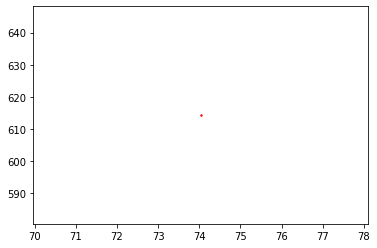

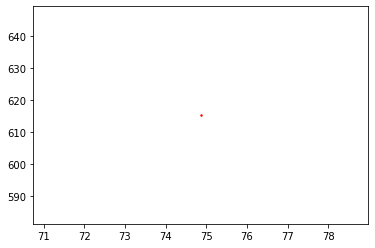

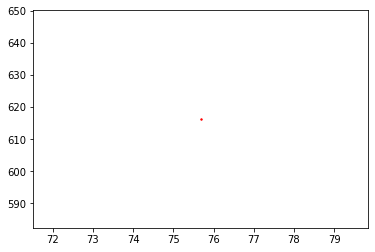

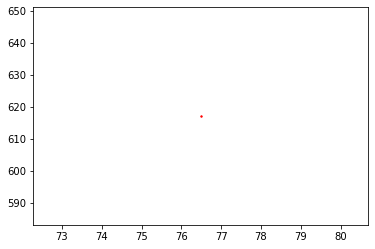

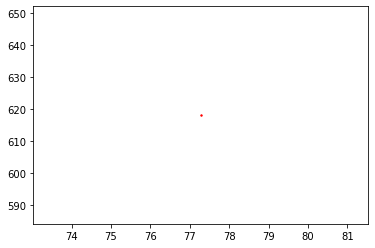

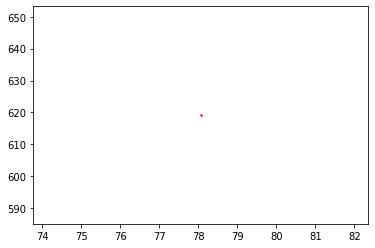

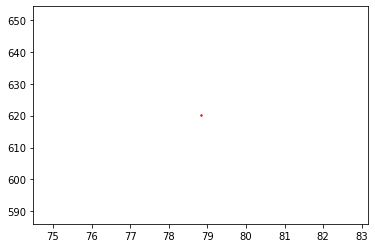

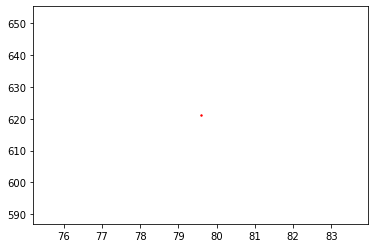

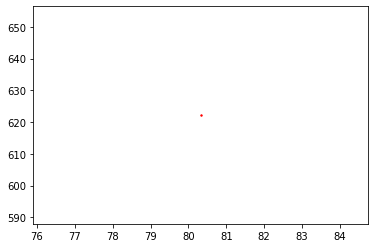

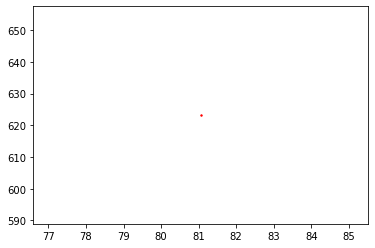

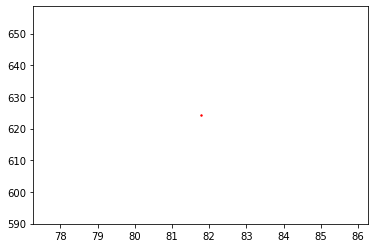

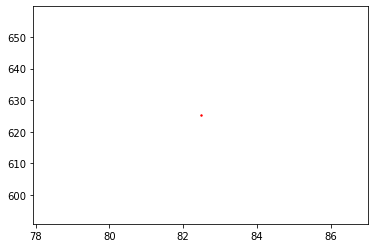

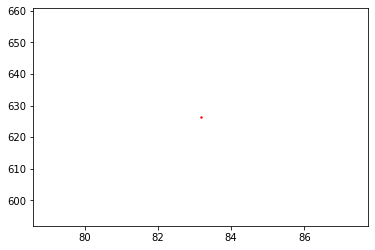

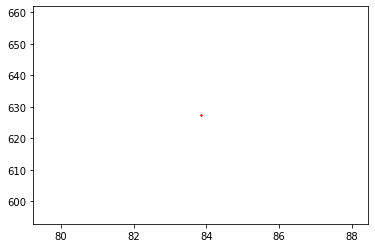

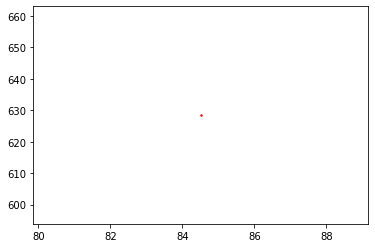

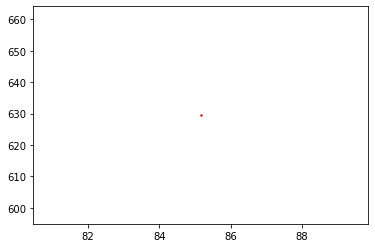

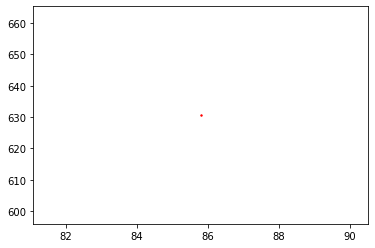

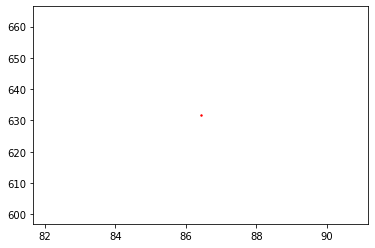

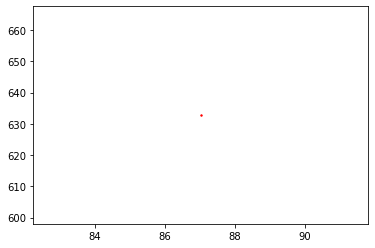

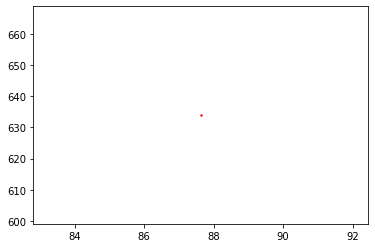

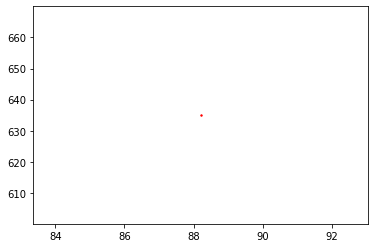

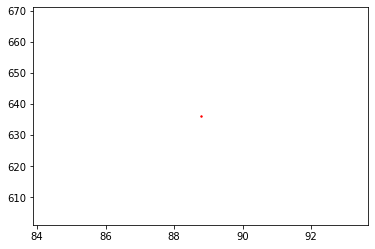

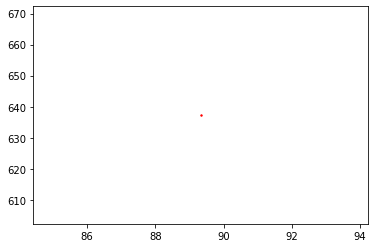

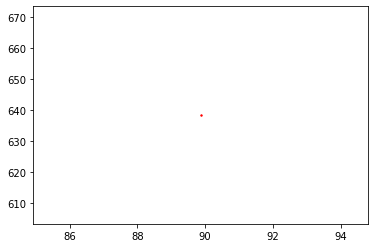

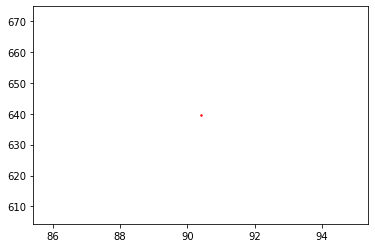

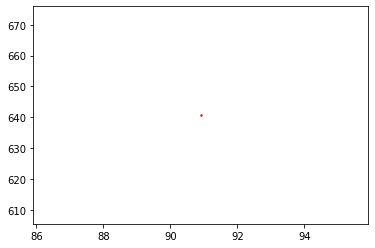

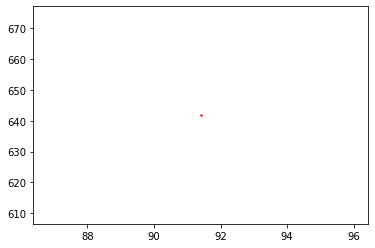

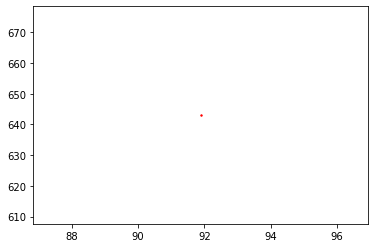

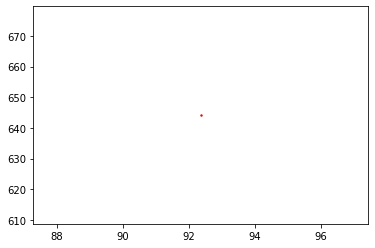

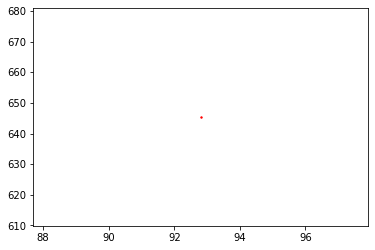

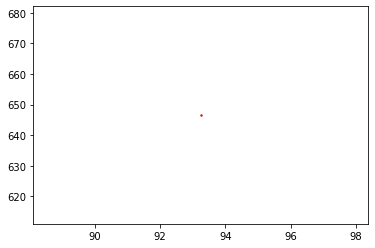

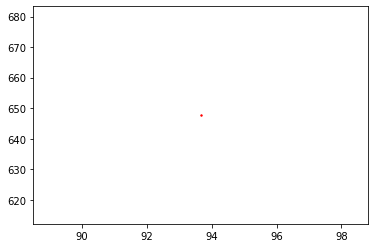

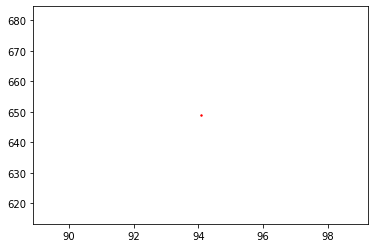

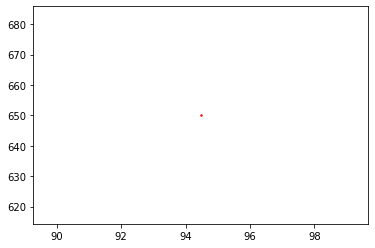

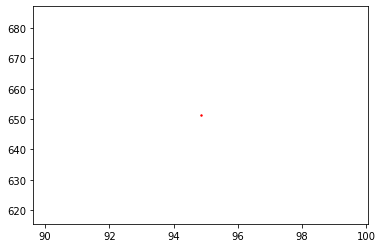

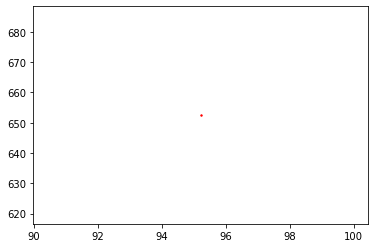

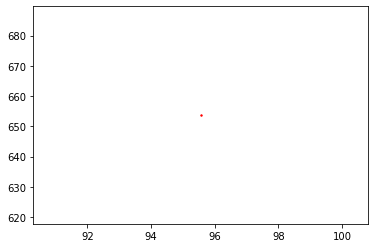

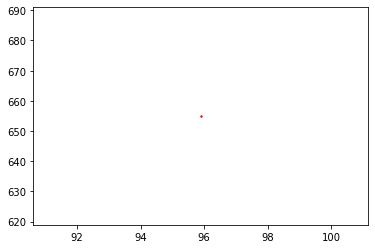

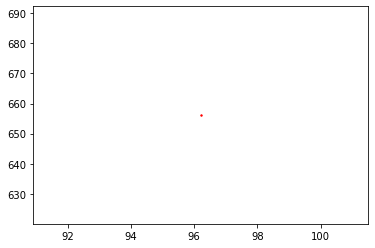

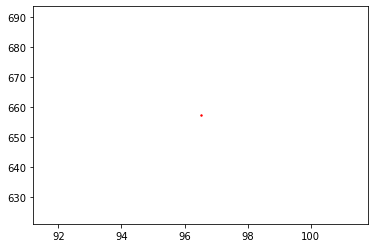

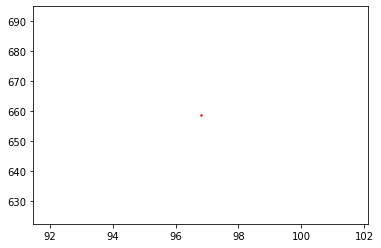

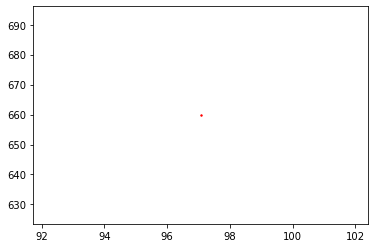

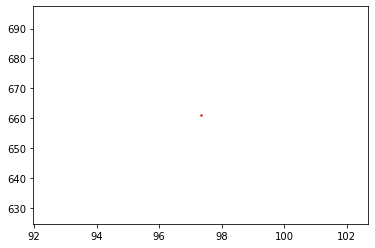

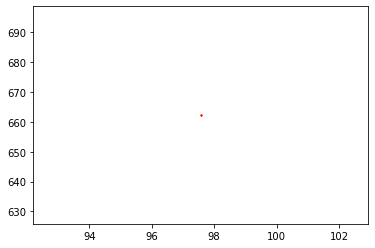

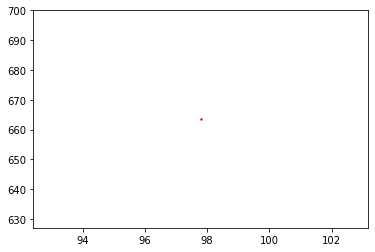

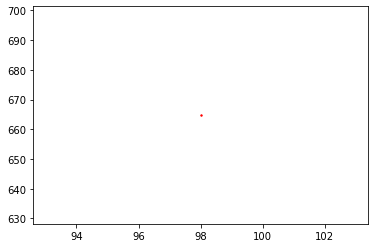

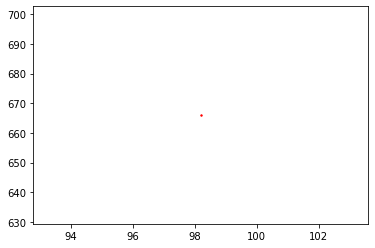

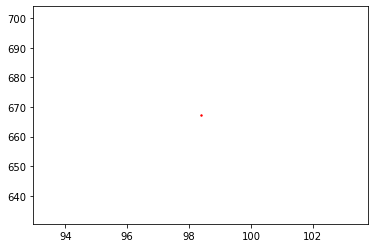

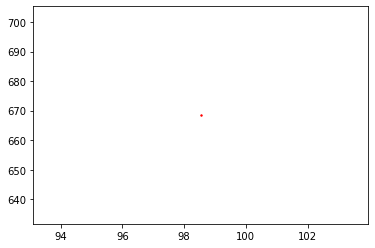

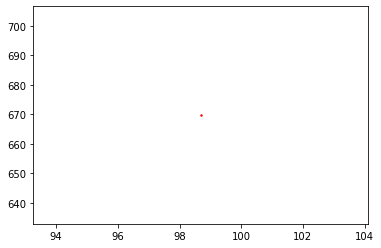

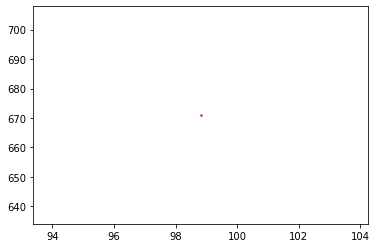

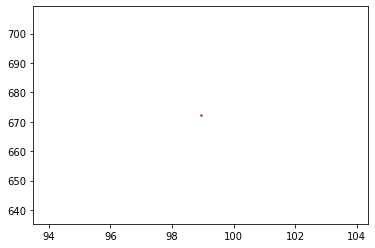

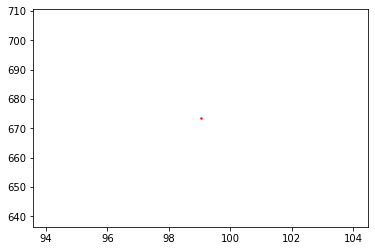

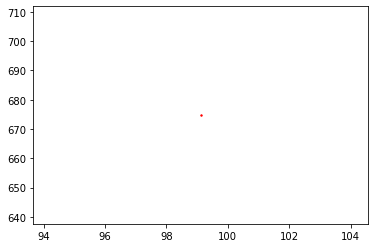

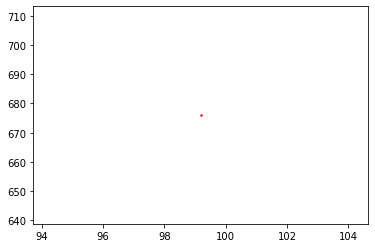

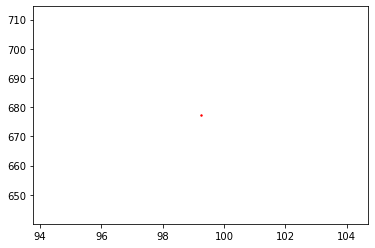

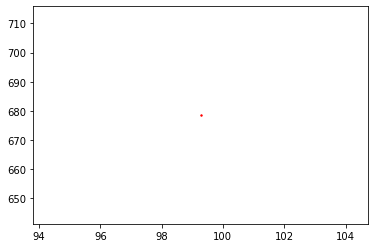

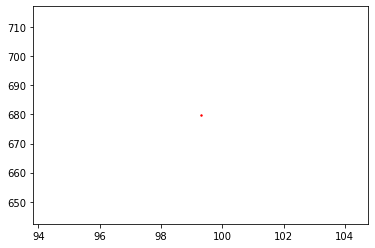

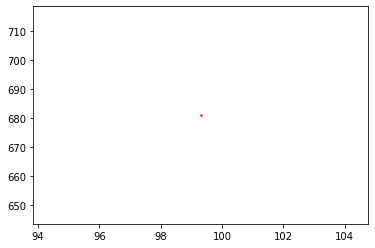

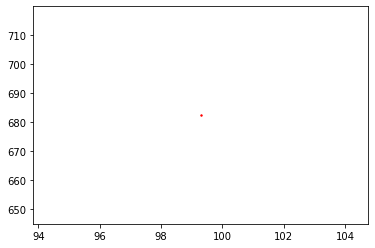

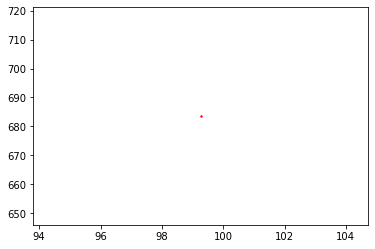

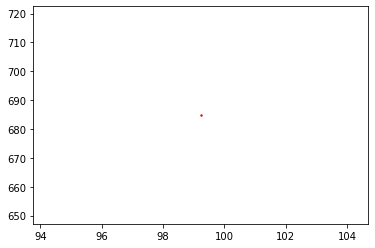

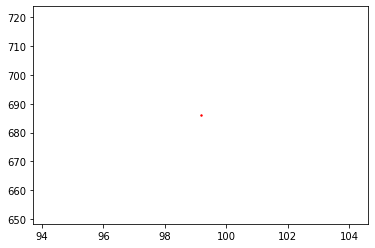

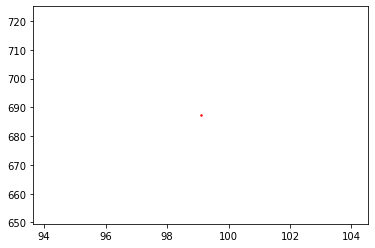

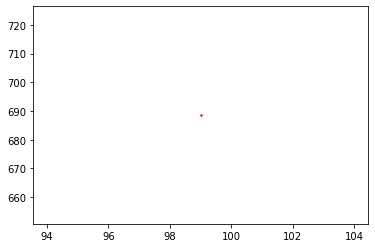

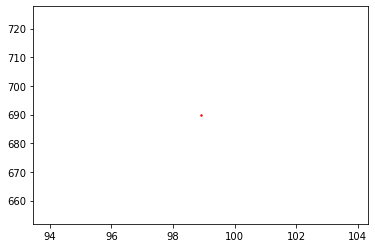

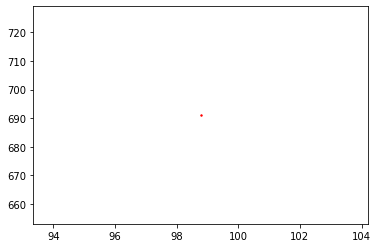

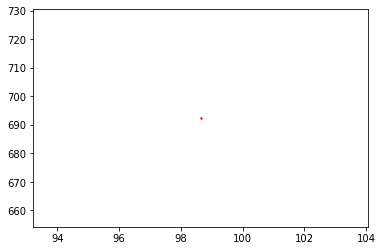

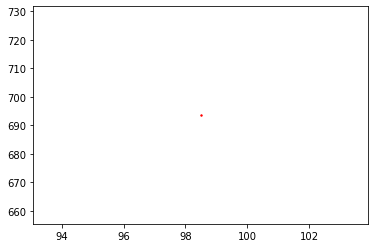

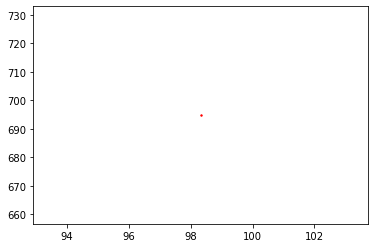

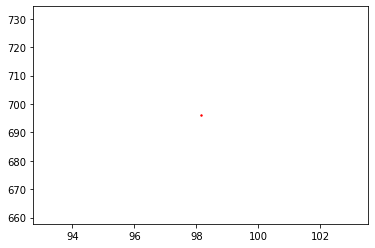

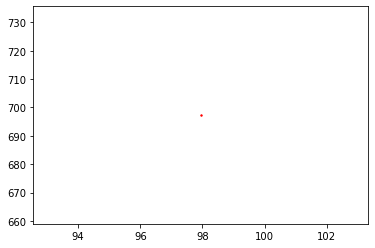

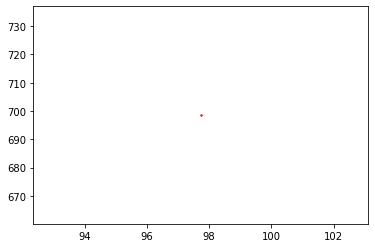

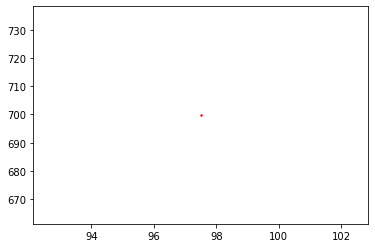

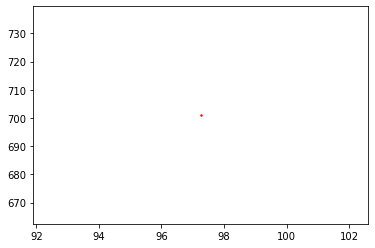

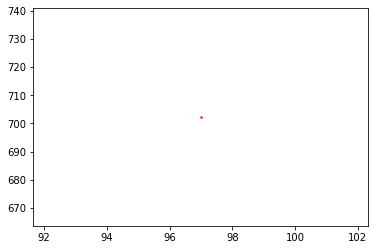

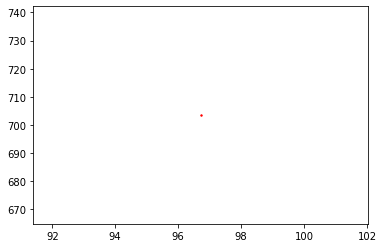

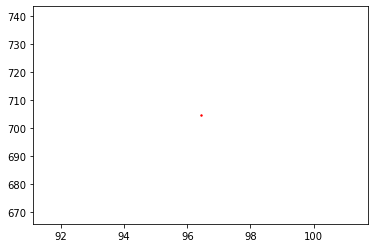

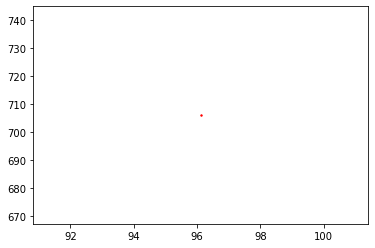

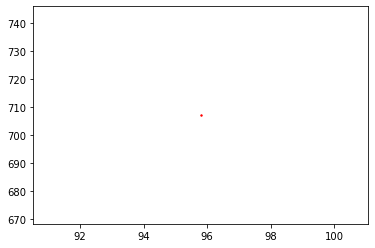

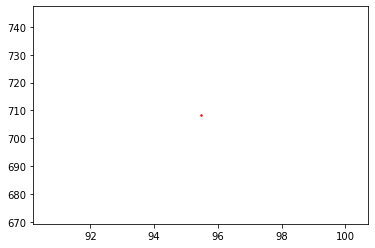

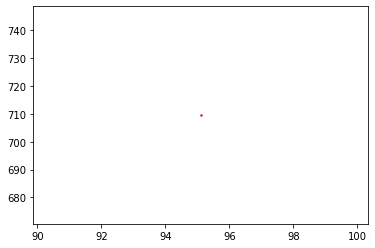

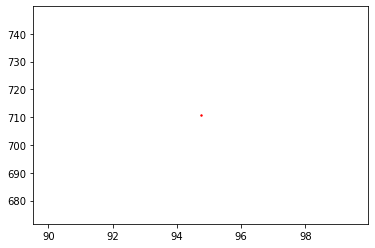

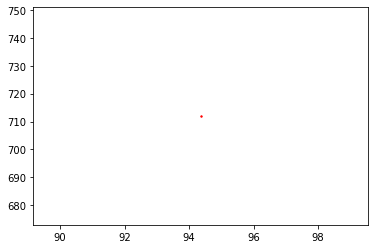

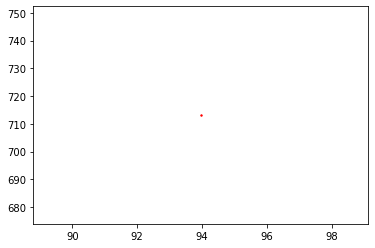

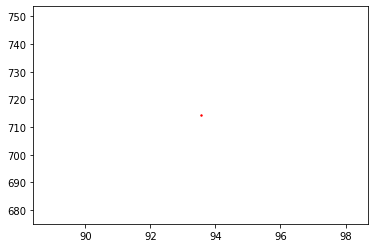

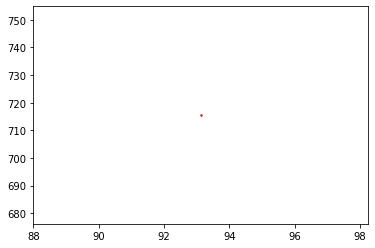

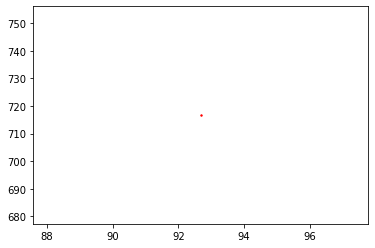

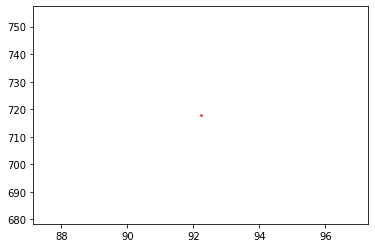

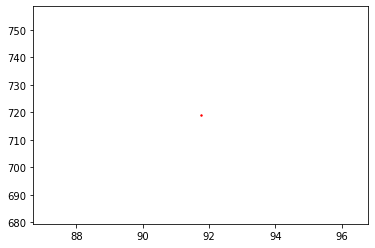

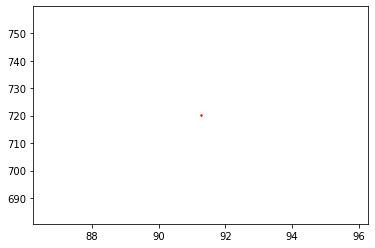

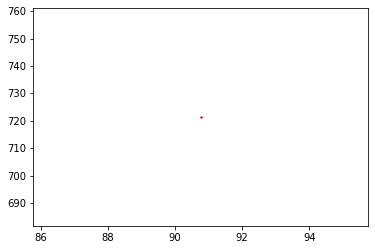

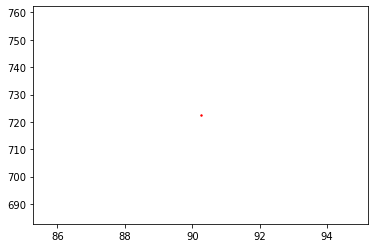

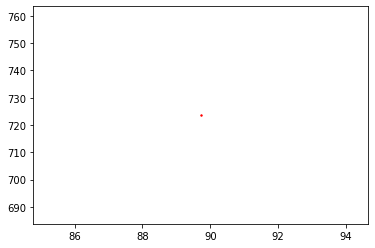

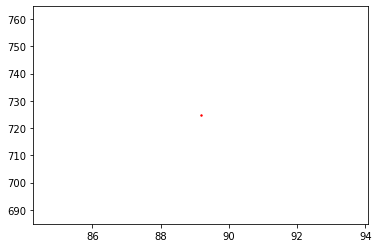

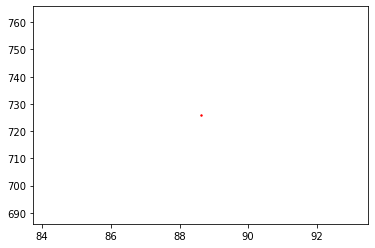

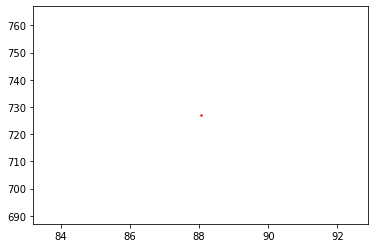

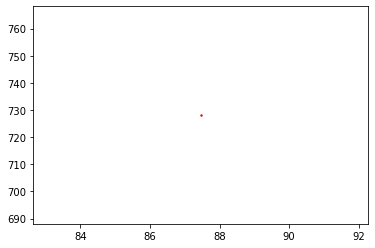

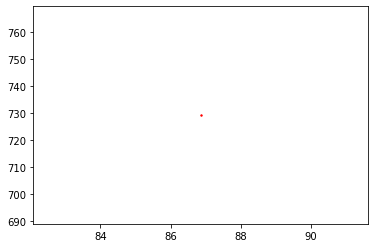

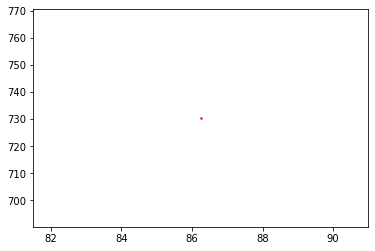

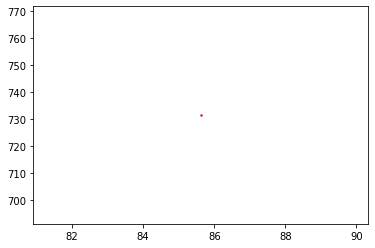

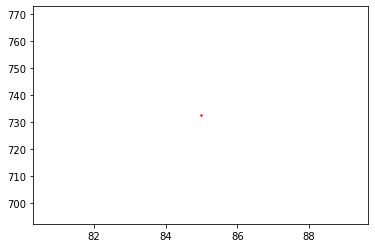

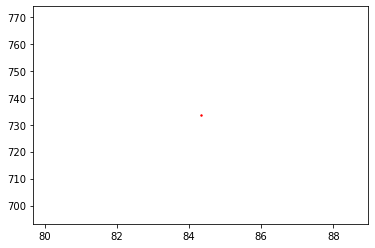

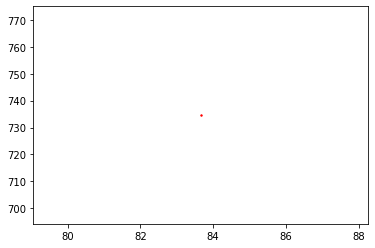

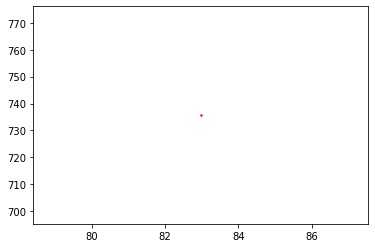

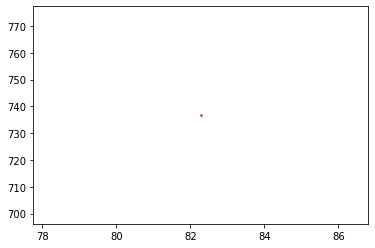

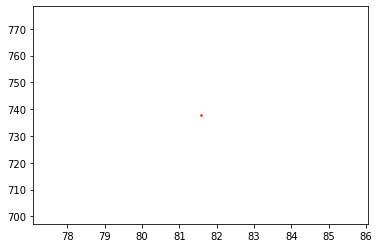

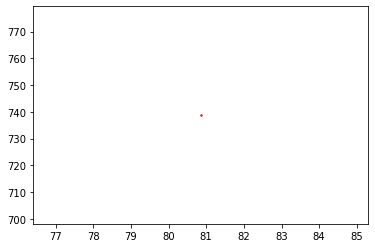

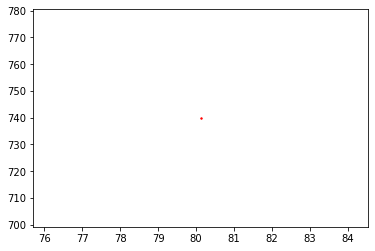

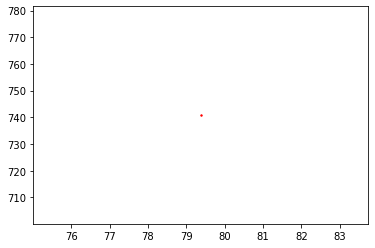

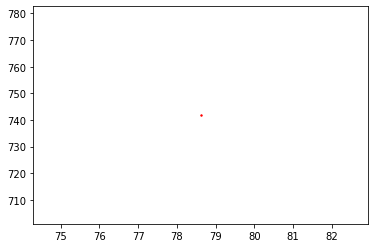

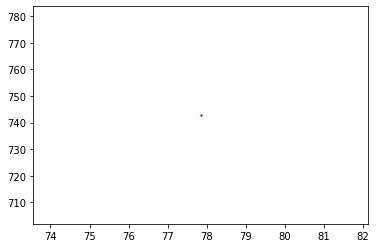

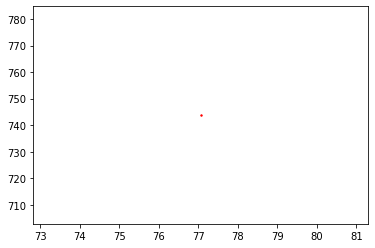

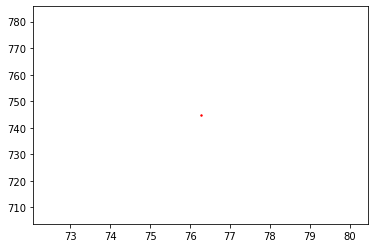

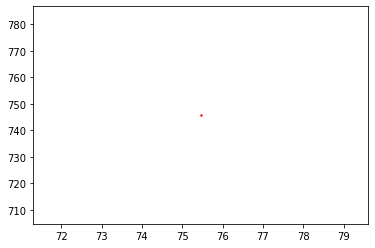

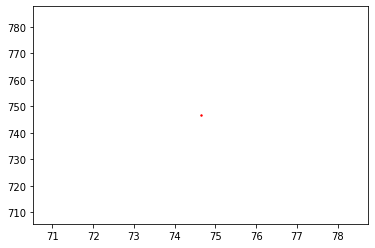

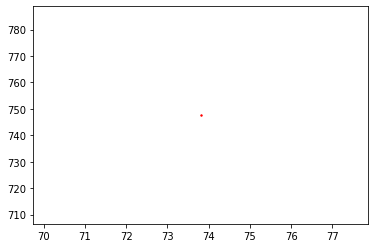

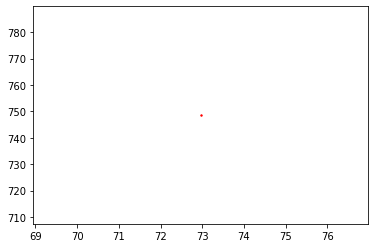

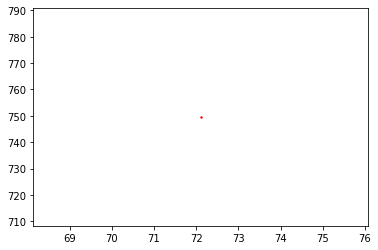

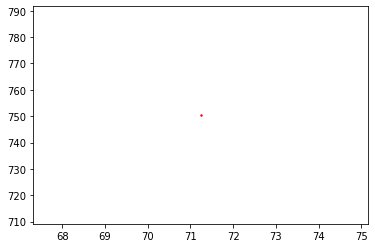

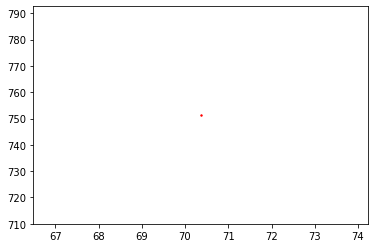

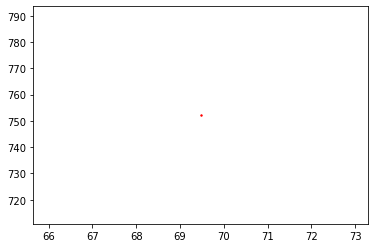

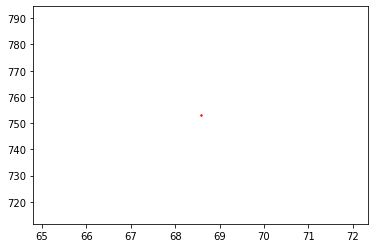

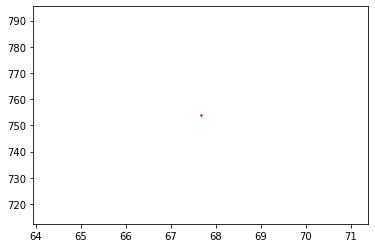

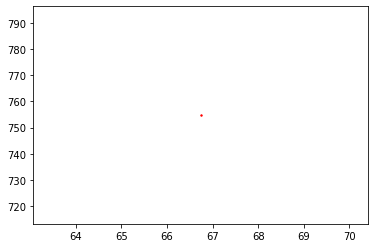

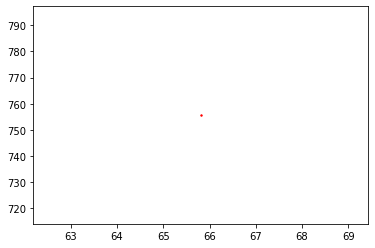

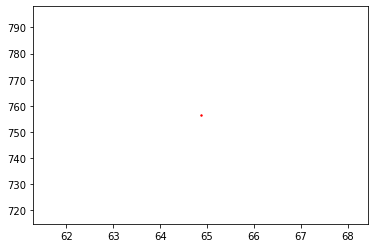

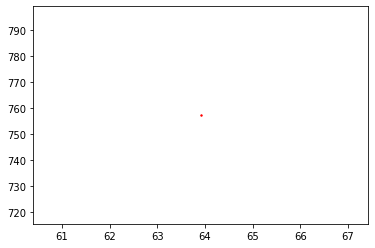

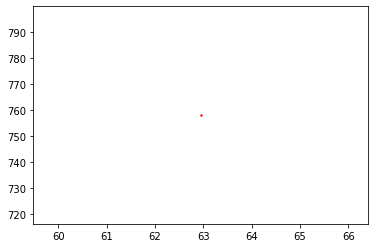

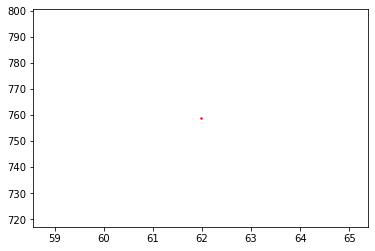

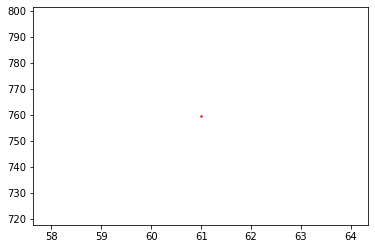

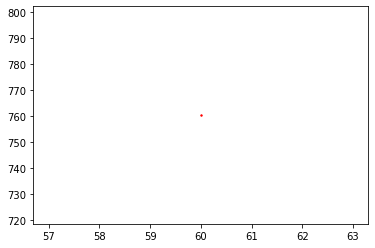

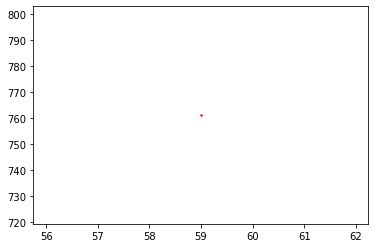

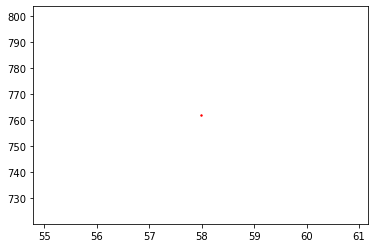

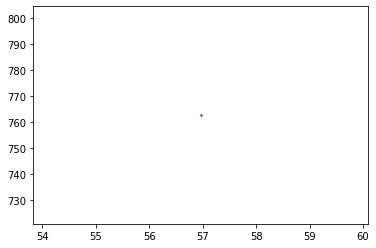

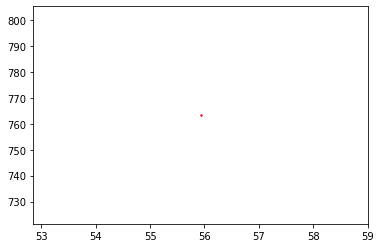

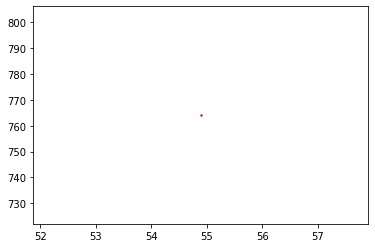

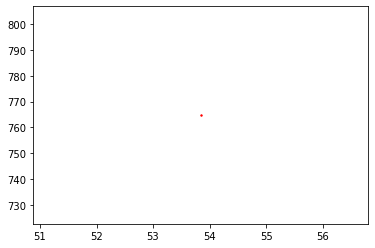

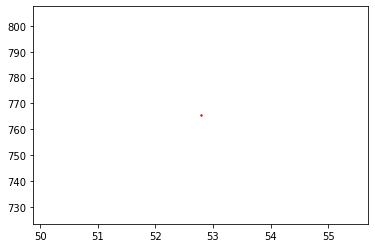

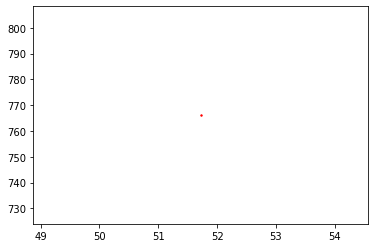

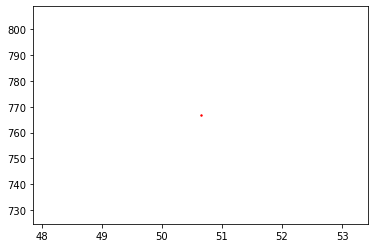

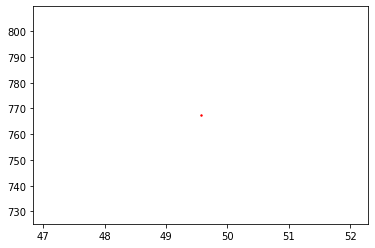

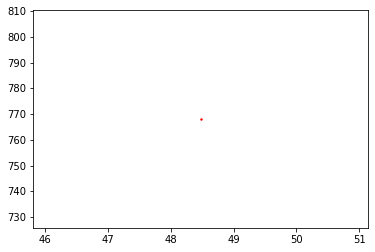

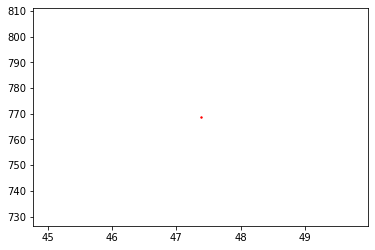

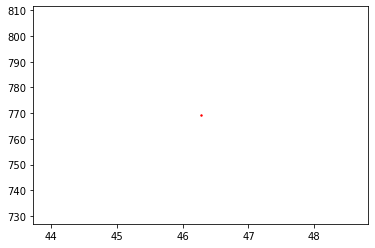

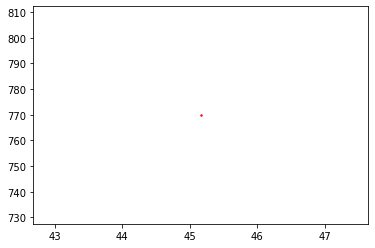

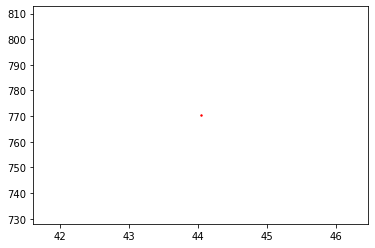

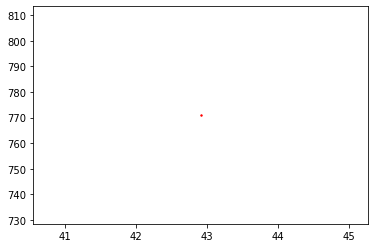

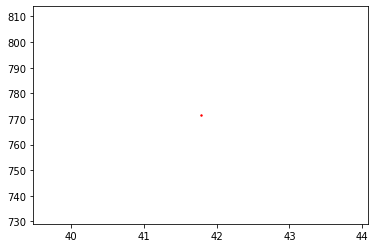

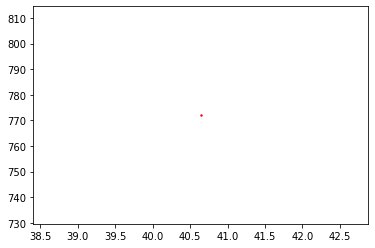

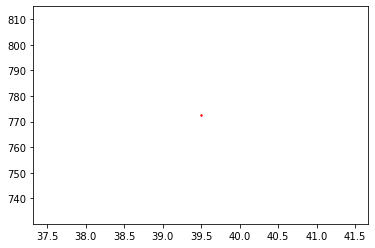

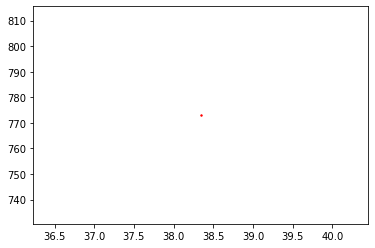

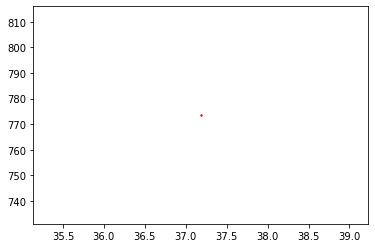

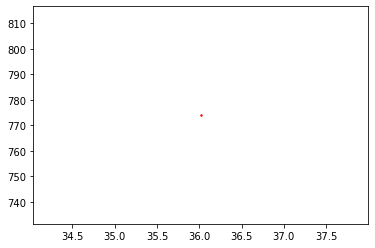

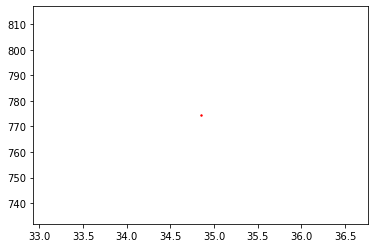

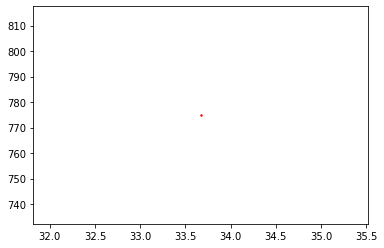

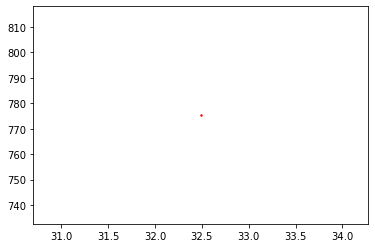

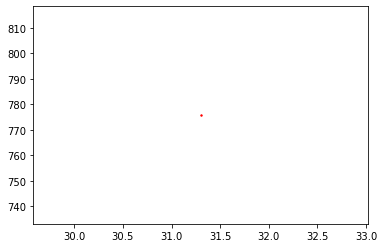

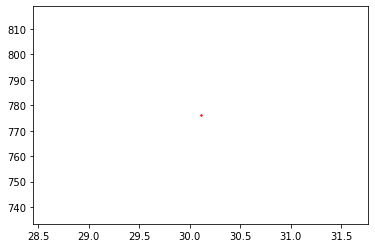

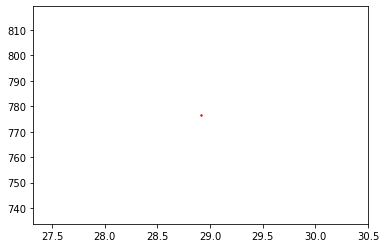

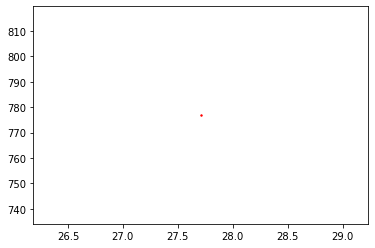

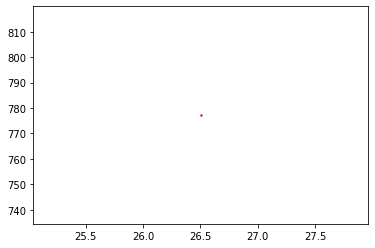

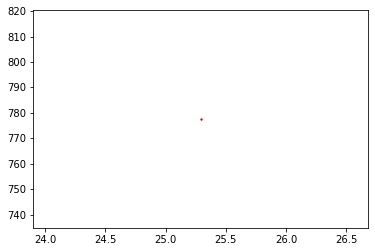

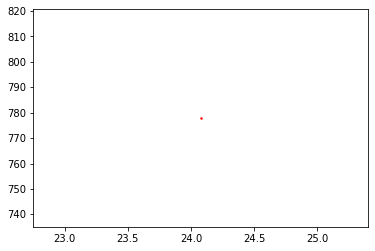

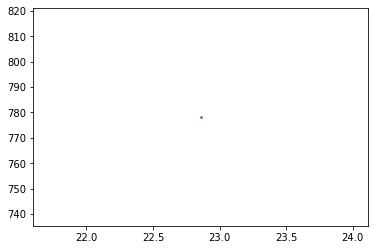

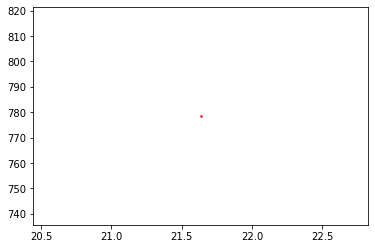

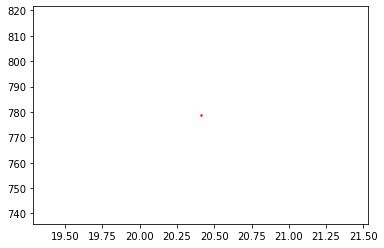

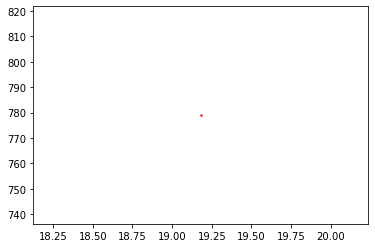

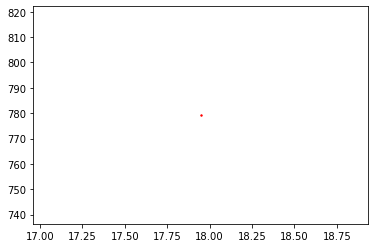

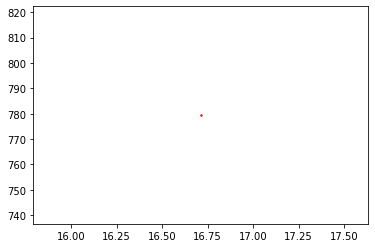

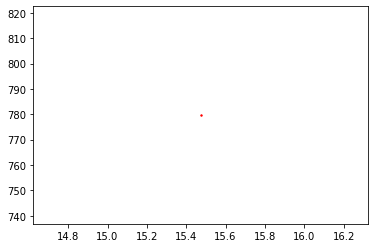

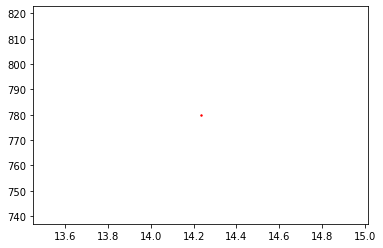

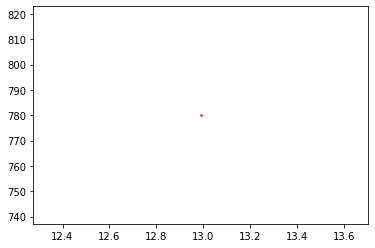

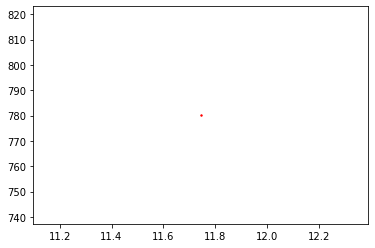

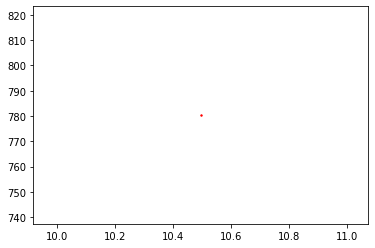

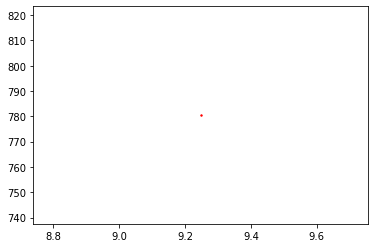

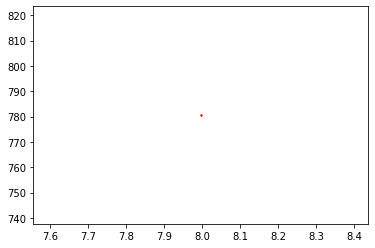

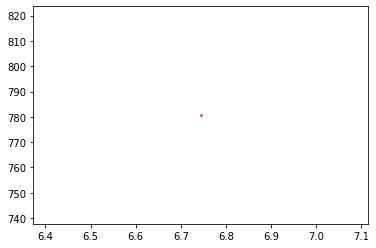

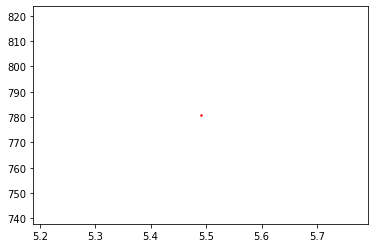

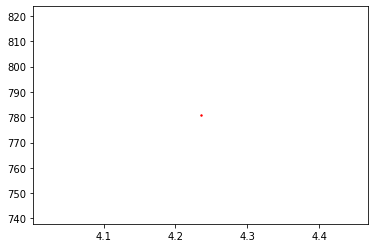

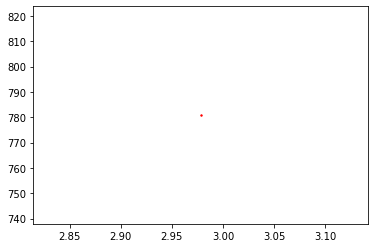

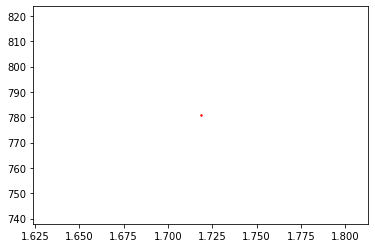

In [3]:
#Plotting points in a single plot is not working in python notebook files with the pause function
#plt.axis([-150, 150, 575, 782])

j=0
for j in range(n):
    plt.scatter(xg[j], zg[j], color= "red", s=2)
    plt.pause(0.005)
plt.show()